# Comprehensive Guide to Tuning Neural Networks 🧠

<img src="https://miro.medium.com/v2/resize:fit:1400/1*bhFifratH9DjKqMBTeQG5A.gif" width="600" alt="Neural Network Animation">

## Welcome to Neural Network Tuning! 👋

Neural networks are powerful machine learning models, but they require careful tuning to perform well. This comprehensive guide will teach you everything you need to know about:

- **Data preprocessing and normalization** 📊
- **Regularization techniques** 🎯
- **Optimization strategies** ⚡
- **Weight initialization** 🎲
- **Hyperparameter tuning** 🔧

## Learning Objectives

By the end of this notebook, you will be able to:

✅ Understand why normalization is crucial for neural network training  
✅ Implement different regularization techniques to prevent overfitting  
✅ Compare various optimization algorithms (SGD, Adam, RMSprop)  
✅ Apply proper weight initialization strategies  
✅ Use early stopping and validation techniques  
✅ Follow best practices for hyperparameter tuning  

Let's embark on this exciting journey! 🚀

## 1. Import Required Libraries 📚

Let's start by importing all the libraries we'll need for building and tuning neural networks.

<img src="https://miro.medium.com/v2/resize:fit:1200/1*cyXCE-JcBelTyrK-58w6_Q.png" width="500" alt="Python Libraries for ML">

In [1]:
# Core libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Machine Learning libraries
from sklearn.datasets import load_breast_cancer, fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelBinarizer, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report

# Deep Learning with Keras/TensorFlow
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import regularizers, optimizers, initializers
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.utils import to_categorical

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Configure display options
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
%matplotlib inline
warnings.filterwarnings('ignore')

print("✅ All libraries imported successfully!")
print(f"📦 TensorFlow version: {tf.__version__}")
print(f"📦 Keras version: {keras.__version__}")

✅ All libraries imported successfully!
📦 TensorFlow version: 2.18.0
📦 Keras version: 3.11.2


## 2. Load and Explore Sample Dataset 🔍

We'll use the **Breast Cancer Wisconsin Dataset** - a classic binary classification problem. This dataset contains features computed from breast cancer cell images, and we need to predict whether a tumor is malignant or benign.


### Why this dataset is perfect for learning neural networks:
- **Real-world problem**: Medical diagnosis
- **Moderate size**: Not too small, not too large
- **Mixed features**: Some features have different scales
- **Binary classification**: Good starting point

In [2]:
# Load the breast cancer dataset
bc_data = load_breast_cancer()

# Create feature matrix and target vector
X = pd.DataFrame(bc_data.data, columns=bc_data.feature_names)
y = bc_data.target  # 0 = malignant, 1 = benign

print("🎯 Dataset Overview:")
print(f"📊 Number of samples: {X.shape[0]}")
print(f"📊 Number of features: {X.shape[1]}")
print(f"📊 Target classes: {bc_data.target_names}")
print(f"📊 Class distribution:")
print(f"   - Malignant (0): {(y == 0).sum()}")
print(f"   - Benign (1): {(y == 1).sum()}")

# Display first few rows
print("\n🔍 First 5 rows of features:")
display(X.head())

# Check for missing values
print(f"\n❓ Missing values per feature:")
missing_counts = X.isnull().sum()
if missing_counts.sum() == 0:
    print("✅ No missing values found!")
else:
    print(missing_counts[missing_counts > 0])

# Check data types
print(f"\n📝 Data types:")
print(X.dtypes.value_counts())

🎯 Dataset Overview:
📊 Number of samples: 569
📊 Number of features: 30
📊 Target classes: ['malignant' 'benign']
📊 Class distribution:
   - Malignant (0): 212
   - Benign (1): 357

🔍 First 5 rows of features:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678



❓ Missing values per feature:
✅ No missing values found!

📝 Data types:
float64    30
Name: count, dtype: int64


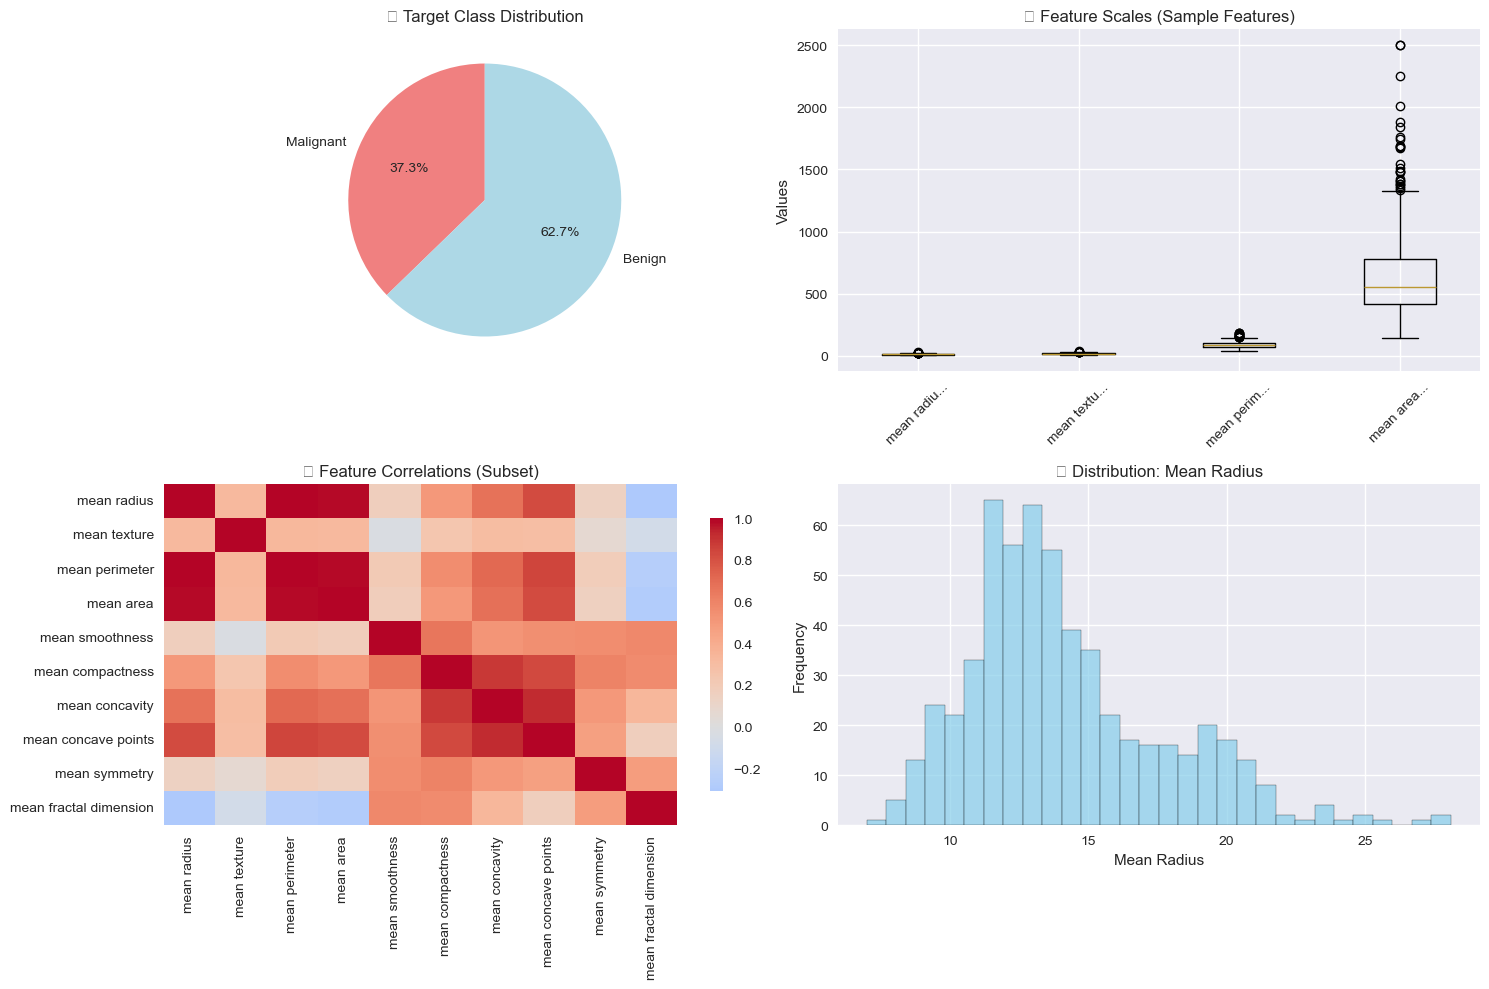

📈 Descriptive Statistics (Sample Features):


,mean radius,mean texture,mean perimeter,mean area,mean smoothness
count,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360
std,3.524049,4.301036,24.298981,351.914129,0.014064
min,6.981000,9.710000,43.790000,143.500000,0.052630
25%,11.700000,16.170000,75.170000,420.300000,0.086370
50%,13.370000,18.840000,86.240000,551.100000,0.095870
75%,15.780000,21.800000,104.100000,782.700000,0.105300
max,28.110000,39.280000,188.500000,2501.000000,0.163400


In [3]:
# Let's visualize some key aspects of our data
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Target distribution
axes[0, 0].pie([sum(y == 0), sum(y == 1)], labels=['Malignant', 'Benign'], 
               autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightblue'])
axes[0, 0].set_title('🎯 Target Class Distribution')

# 2. Feature scale comparison (first 4 features)
sample_features = X.iloc[:, :4]
axes[0, 1].boxplot([sample_features[col] for col in sample_features.columns])
axes[0, 1].set_xticklabels([col[:10] + '...' for col in sample_features.columns], rotation=45)
axes[0, 1].set_title('📏 Feature Scales (Sample Features)')
axes[0, 1].set_ylabel('Values')

# 3. Correlation heatmap (subset of features)
subset_features = X.iloc[:, :10]  # First 10 features for clarity
correlation_matrix = subset_features.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0, 
            ax=axes[1, 0], cbar_kws={'shrink': 0.8})
axes[1, 0].set_title('🔥 Feature Correlations (Subset)')

# 4. Distribution of a sample feature
axes[1, 1].hist(X['mean radius'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
axes[1, 1].set_title('📊 Distribution: Mean Radius')
axes[1, 1].set_xlabel('Mean Radius')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Display descriptive statistics
print("📈 Descriptive Statistics (Sample Features):")
display(X.iloc[:, :5].describe())

## 3. Data Preprocessing and Normalization 🔧

**Why is normalization crucial for neural networks?**



Neural networks are sensitive to the scale of input features because:
1. **Gradient descent optimization** works better when features have similar scales
2. **Weight updates** become unstable with vastly different input ranges
3. **Learning rates** that work well for one feature might be too large/small for others
4. **Convergence** happens faster and more reliably with normalized data

### Common Normalization Techniques:
- **StandardScaler (Z-score)**: Mean = 0, Std = 1
- **MinMaxScaler**: Scale to range [0,1]
- **RobustScaler**: Uses median and IQR (robust to outliers)

In [4]:
# First, let's split our data into train, validation, and test sets
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp)

print("📊 Data Split Summary:")
print(f"Training set: {X_train.shape[0]} samples")
print(f"Validation set: {X_val.shape[0]} samples") 
print(f"Test set: {X_test.shape[0]} samples")

# Let's compare data before and after normalization
print("\n🔍 Before Normalization:")
print("Sample feature statistics:")
sample_stats_before = X_train[['mean radius', 'mean area', 'mean smoothness']].describe()
display(sample_stats_before)

# Apply StandardScaler normalization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame for analysis
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns, index=X_train.index)

print("\n✨ After Normalization:")
print("Sample feature statistics:")
sample_stats_after = X_train_scaled_df[['mean radius', 'mean area', 'mean smoothness']].describe()
display(sample_stats_after)

📊 Data Split Summary:
Training set: 341 samples
Validation set: 114 samples
Test set: 114 samples

🔍 Before Normalization:
Sample feature statistics:


,mean radius,mean area,mean smoothness
count,341.000000,341.000000,341.000000
mean,14.030343,646.441935,0.096563
std,3.550771,352.949179,0.013524
min,6.981000,143.500000,0.062510
25%,11.600000,412.600000,0.086750
50%,13.170000,536.900000,0.096760
75%,15.490000,744.900000,0.105400
max,28.110000,2499.000000,0.142500



✨ After Normalization:
Sample feature statistics:


,mean radius,mean area,mean smoothness
count,3.410000e+02,3.410000e+02,3.410000e+02
mean,-4.349730e-16,-1.302314e-16,1.459894e-15
std,1.001470e+00,1.001470e+00,1.001470e+00
min,-1.988216e+00,-1.427064e+00,-2.521608e+00
25%,-6.854608e-01,-6.635107e-01,-7.266289e-01
50%,-2.426536e-01,-3.108179e-01,1.461462e-02
75%,4.116857e-01,2.793681e-01,6.544092e-01
max,3.971066e+00,5.256509e+00,3.401675e+00


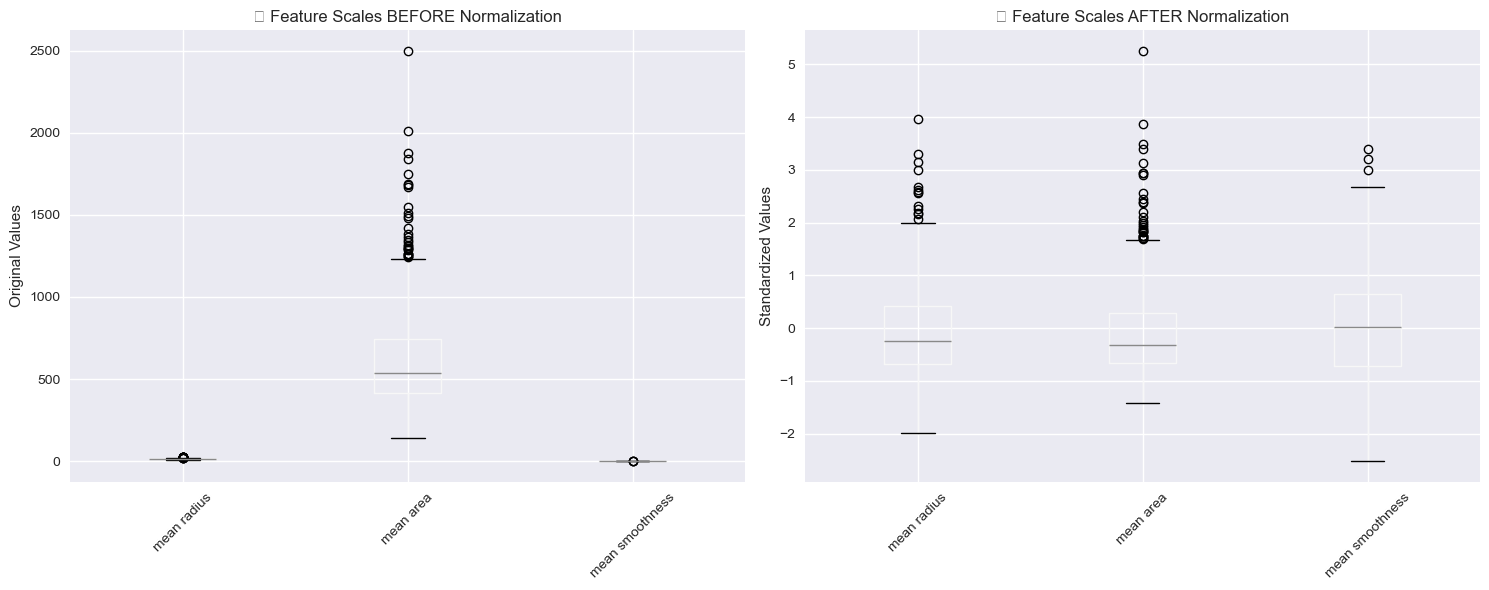

🎯 Key Observations:
• Before: Features have vastly different scales (0.05 vs 2000+)
• After: All features centered around 0 with std ≈ 1
• This ensures fair treatment of all features during training!

⚡ Impact on Neural Network Training:
• Normalized features → Stable gradients → Faster convergence
• Non-normalized features → Exploding/vanishing gradients → Poor performance
• Think of it as giving all features an 'equal voice' in the decision process


In [5]:
# Visualize the dramatic effect of normalization
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Before normalization
sample_features = ['mean radius', 'mean area', 'mean smoothness']
X_train[sample_features].boxplot(ax=axes[0])
axes[0].set_title('📊 Feature Scales BEFORE Normalization')
axes[0].set_ylabel('Original Values')
axes[0].tick_params(axis='x', rotation=45)

# After normalization  
X_train_scaled_df[sample_features].boxplot(ax=axes[1])
axes[1].set_title('✨ Feature Scales AFTER Normalization')
axes[1].set_ylabel('Standardized Values')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print("🎯 Key Observations:")
print("• Before: Features have vastly different scales (0.05 vs 2000+)")
print("• After: All features centered around 0 with std ≈ 1")
print("• This ensures fair treatment of all features during training!")

# Show the impact on gradients (simplified explanation)
print("\n⚡ Impact on Neural Network Training:")
print("• Normalized features → Stable gradients → Faster convergence")
print("• Non-normalized features → Exploding/vanishing gradients → Poor performance")
print("• Think of it as giving all features an 'equal voice' in the decision process")

## 4. Building a Baseline Neural Network 🏗️

Let's start by building a simple neural network and demonstrate why normalization is crucial. We'll first try WITHOUT normalization to see the problems, then WITH normalization.

<img src="https://miro.medium.com/v2/resize:fit:1200/1*3fA77_mLNiJTSgZFhYnU0Q.png" width="600" alt="Neural Network Architecture">

### Neural Network Architecture:
- **Input Layer**: 30 features (our dataset has 30 features)
- **Hidden Layer 1**: 10 neurons with ReLU activation
- **Hidden Layer 2**: 5 neurons with ReLU activation  
- **Output Layer**: 1 neuron with sigmoid activation (binary classification)

In [ ]:
def create_baseline_model(input_dim):
    """
    Create a simple baseline neural network model
    """
    model = Sequential([
        Dense(10, activation='relu', input_shape=(input_dim,)),
        Dense(5, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    
    model.compile(
        optimizer='sgd', # Stochastic Gradient Descent
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    
    return model

# Function to visualize training history
def plot_training_history(history, title="Training History"):
    """
    Plot training and validation loss/accuracy
    """
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    # Plot loss
    axes[0].plot(history.history['loss'], label='Training Loss', color='blue', linewidth=2)
    axes[0].plot(history.history['val_loss'], label='Validation Loss', color='red', linewidth=2)
    axes[0].set_title(f'{title} - Loss')
    axes[0].set_xlabel('Epochs')
    axes[0].set_ylabel('Loss')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)
    
    # Plot accuracy
    axes[1].plot(history.history['accuracy'], label='Training Accuracy', color='blue', linewidth=2)
    axes[1].plot(history.history['val_accuracy'], label='Validation Accuracy', color='red', linewidth=2)
    axes[1].set_title(f'{title} - Accuracy')
    axes[1].set_xlabel('Epochs')
    axes[1].set_ylabel('Accuracy')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

print("✅ Helper functions created!")
print("🔧 Functions available:")
print("   • create_baseline_model(): Creates a simple neural network")
print("   • plot_training_history(): Visualizes training progress")

✅ Helper functions created!
🔧 Functions available:
   • create_baseline_model(): Creates a simple neural network
   • plot_training_history(): Visualizes training progress


⚠️ Training without normalization (this will show poor results)...


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │           310 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │            55 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 371 (1.45 KB)

 Trainable params: 371 (1.45 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6158 - loss: 167.7827 - val_accuracy: 0.6228 - val_loss: 0.6914
Epoch 2/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6158 - loss: 167.7827 - val_accuracy: 0.6228 - val_loss: 0.6914
Epoch 2/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6276 - loss: 0.6907 - val_accuracy: 0.6228 - val_loss: 0.6898
Epoch 3/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6276 - loss: 0.6907 - val_accuracy: 0.6228 - val_loss: 0.6898
Epoch 3/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6276 - loss: 0.6890 - val_accuracy: 0.6228 - val_loss: 0.6883
Epoch 4/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6276 - loss: 0.6890 - val_accuracy: 0.6228 - val_loss: 0.6883
Epoch 4/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6276 - loss: 0.6875 - val_accuracy: 0.6228 - val_loss: 0.6868
Epoch 5/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6276 - loss: 0.6875 - val_accuracy: 0.6228 - val

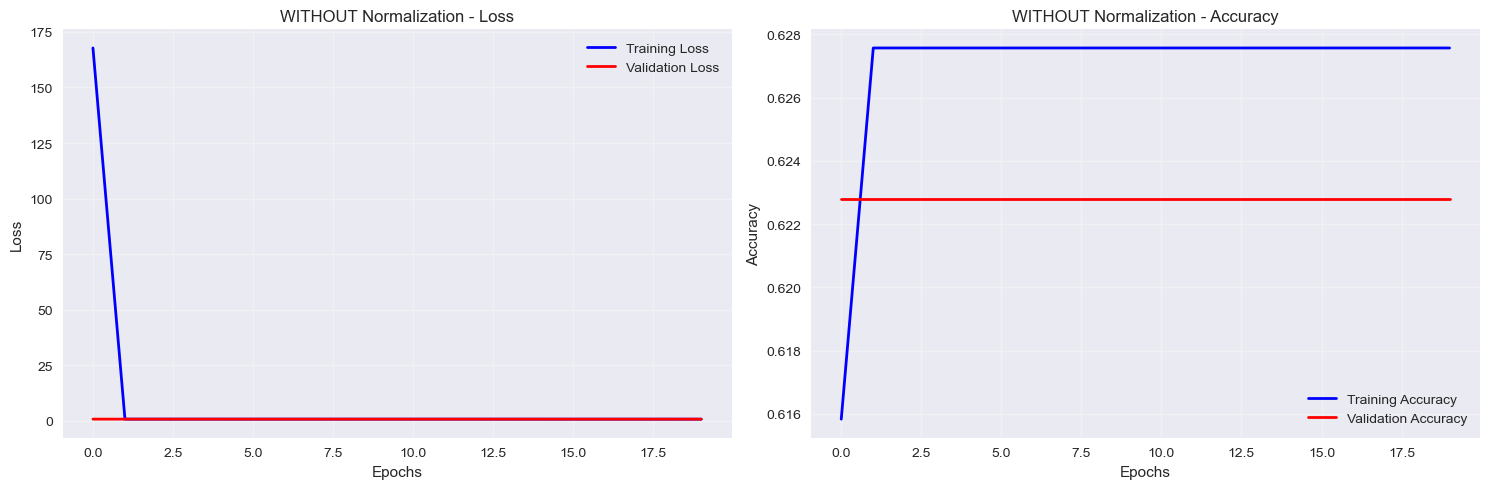

In [7]:
### 🚫 Experiment 1: Training WITHOUT Normalization

print("⚠️ Training without normalization (this will show poor results)...")

# Create model with original (non-normalized) data
model_no_norm = create_baseline_model(X_train.shape[1])
model_no_norm.summary()

# Train the model (expect poor performance)
history_no_norm = model_no_norm.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val, y_val),
    verbose=1
)

# Evaluate the model
train_loss_no_norm, train_acc_no_norm = model_no_norm.evaluate(X_train, y_train, verbose=0)
val_loss_no_norm, val_acc_no_norm = model_no_norm.evaluate(X_val, y_val, verbose=0)

print(f"\n📊 Results WITHOUT normalization:")
print(f"   Training Accuracy: {train_acc_no_norm:.4f}")
print(f"   Validation Accuracy: {val_acc_no_norm:.4f}")
print(f"   Training Loss: {train_loss_no_norm:.4f}")
print(f"   Validation Loss: {val_loss_no_norm:.4f}")

# Plot results
plot_training_history(history_no_norm, "WITHOUT Normalization")

🎯 Training with normalization (much better results expected)...
Epoch 1/20
Epoch 1/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5191 - loss: 0.8457 - val_accuracy: 0.5175 - val_loss: 0.7823
Epoch 2/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5191 - loss: 0.8457 - val_accuracy: 0.5175 - val_loss: 0.7823
Epoch 2/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5660 - loss: 0.7769 - val_accuracy: 0.5965 - val_loss: 0.7366
Epoch 3/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5660 - loss: 0.7769 - val_accuracy: 0.5965 - val_loss: 0.7366
Epoch 3/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6041 - loss: 0.7319 - val_accuracy: 0.6228 - val_loss: 0.7065
Epoch 4/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6041 - loss: 0.7319 - val_accuracy: 0.6228 - val_loss: 0.7065
Epoch 4/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6540 - loss: 0.7015 - val_accuracy: 0.6842 - val_loss: 0.6853
Epoch 5/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 

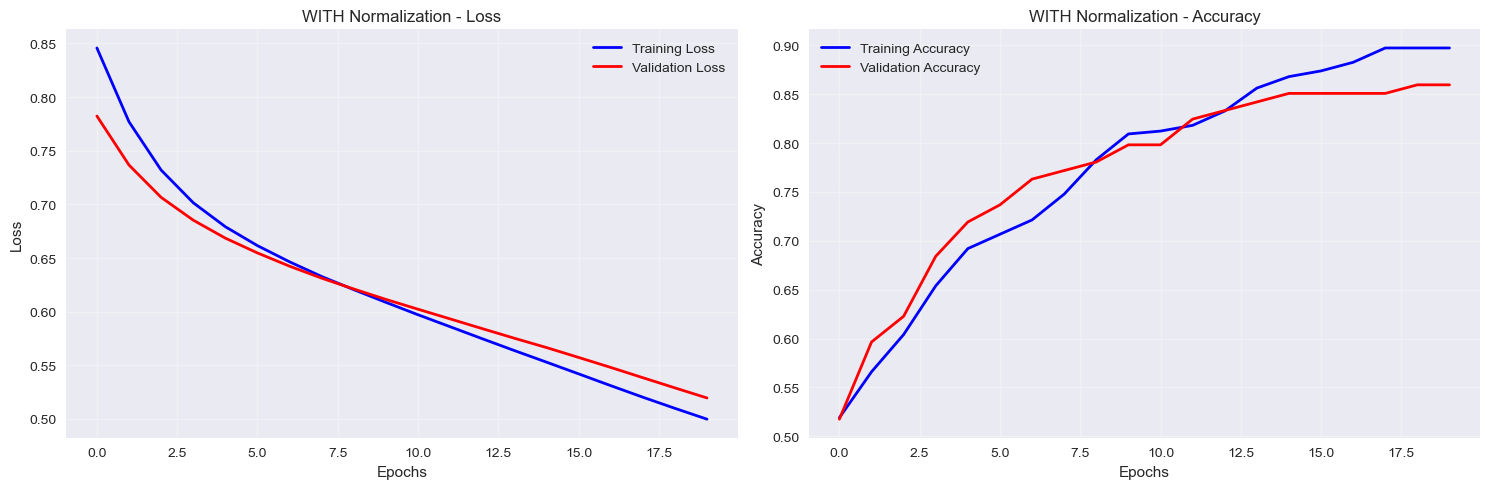


🔥 IMPROVEMENT SUMMARY:
   Validation Accuracy Improvement: 0.2368
   Validation Loss Improvement: 0.1525
   🎯 Normalization made the model 38.0% better!


In [8]:
### ✅ Experiment 2: Training WITH Normalization

print("🎯 Training with normalization (much better results expected)...")

# Create model with normalized data
model_with_norm = create_baseline_model(X_train_scaled.shape[1])

# Train the model
history_with_norm = model_with_norm.fit(
    X_train_scaled, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val_scaled, y_val),
    verbose=1
)

# Evaluate the model
train_loss_with_norm, train_acc_with_norm = model_with_norm.evaluate(X_train_scaled, y_train, verbose=0)
val_loss_with_norm, val_acc_with_norm = model_with_norm.evaluate(X_val_scaled, y_val, verbose=0)

print(f"\n📊 Results WITH normalization:")
print(f"   Training Accuracy: {train_acc_with_norm:.4f}")
print(f"   Validation Accuracy: {val_acc_with_norm:.4f}")
print(f"   Training Loss: {train_loss_with_norm:.4f}")
print(f"   Validation Loss: {val_loss_with_norm:.4f}")

# Plot results
plot_training_history(history_with_norm, "WITH Normalization")

# Compare the results
print(f"\n🔥 IMPROVEMENT SUMMARY:")
print(f"   Validation Accuracy Improvement: {val_acc_with_norm - val_acc_no_norm:.4f}")
print(f"   Validation Loss Improvement: {val_loss_no_norm - val_loss_with_norm:.4f}")
print(f"   🎯 Normalization made the model {((val_acc_with_norm/val_acc_no_norm - 1) * 100):.1f}% better!")

## 5. Understanding Bias and Variance Trade-off ⚖️

The **Bias-Variance Trade-off** is fundamental to understanding model performance:

<img src="https://miro.medium.com/v2/resize:fit:1200/1*xwtSpR_zg7j7zusa4IDHNQ.png" width="600" alt="Bias Variance Tradeoff">

### 🎯 Key Concepts:

| Condition | Training Performance | Validation Performance | What's Happening? |
|-----------|---------------------|----------------------|-------------------|
| **High Bias (Underfitting)** | Poor | Poor | Model too simple - can't capture patterns |
| **High Variance (Overfitting)** | Excellent | Poor | Model too complex - memorizes training data |
| **Balanced** | Good | Good | Model complexity just right |

### 🔍 How to Identify:
- **Underfitting**: Both training and validation scores are low
- **Overfitting**: Training score high, validation score low  
- **Good fit**: Both scores are high and close to each other

Let's create models with different complexity levels to see this in action!

In [9]:
# Let's create models with different complexities
def create_simple_model(input_dim):
    """Simple model - might underfit"""
    model = Sequential([
        Dense(5, activation='relu', input_shape=(input_dim,)),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

def create_complex_model(input_dim):
    """Complex model - might overfit"""
    model = Sequential([
        Dense(128, activation='relu', input_shape=(input_dim,)),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

def create_balanced_model(input_dim):
    """Balanced model"""
    model = Sequential([
        Dense(32, activation='relu', input_shape=(input_dim,)),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create and train all three models
models = {
    'Simple (High Bias)': create_simple_model(X_train_scaled.shape[1]),
    'Complex (High Variance)': create_complex_model(X_train_scaled.shape[1]),
    'Balanced': create_balanced_model(X_train_scaled.shape[1])
}

results = {}
histories = {}

print("🚀 Training models with different complexities...\n")

for name, model in models.items():
    print(f"Training {name} model...")
    
    history = model.fit(
        X_train_scaled, y_train,
        epochs=30,
        batch_size=32,
        validation_data=(X_val_scaled, y_val),
        verbose=0
    )
    
    # Store results
    histories[name] = history
    train_loss, train_acc = model.evaluate(X_train_scaled, y_train, verbose=0)
    val_loss, val_acc = model.evaluate(X_val_scaled, y_val, verbose=0)
    
    results[name] = {
        'train_acc': train_acc,
        'val_acc': val_acc,
        'train_loss': train_loss,
        'val_loss': val_loss
    }
    
    print(f"   ✅ Train Acc: {train_acc:.4f}, Val Acc: {val_acc:.4f}\n")

print("📊 Training completed for all models!")

🚀 Training models with different complexities...

Training Simple (High Bias) model...


   ✅ Train Acc: 0.9619, Val Acc: 0.9386

Training Complex (High Variance) model...
   ✅ Train Acc: 1.0000, Val Acc: 0.9825

Training Balanced model...
   ✅ Train Acc: 1.0000, Val Acc: 0.9825

Training Balanced model...
   ✅ Train Acc: 0.9912, Val Acc: 0.9825

📊 Training completed for all models!
   ✅ Train Acc: 0.9912, Val Acc: 0.9825

📊 Training completed for all models!


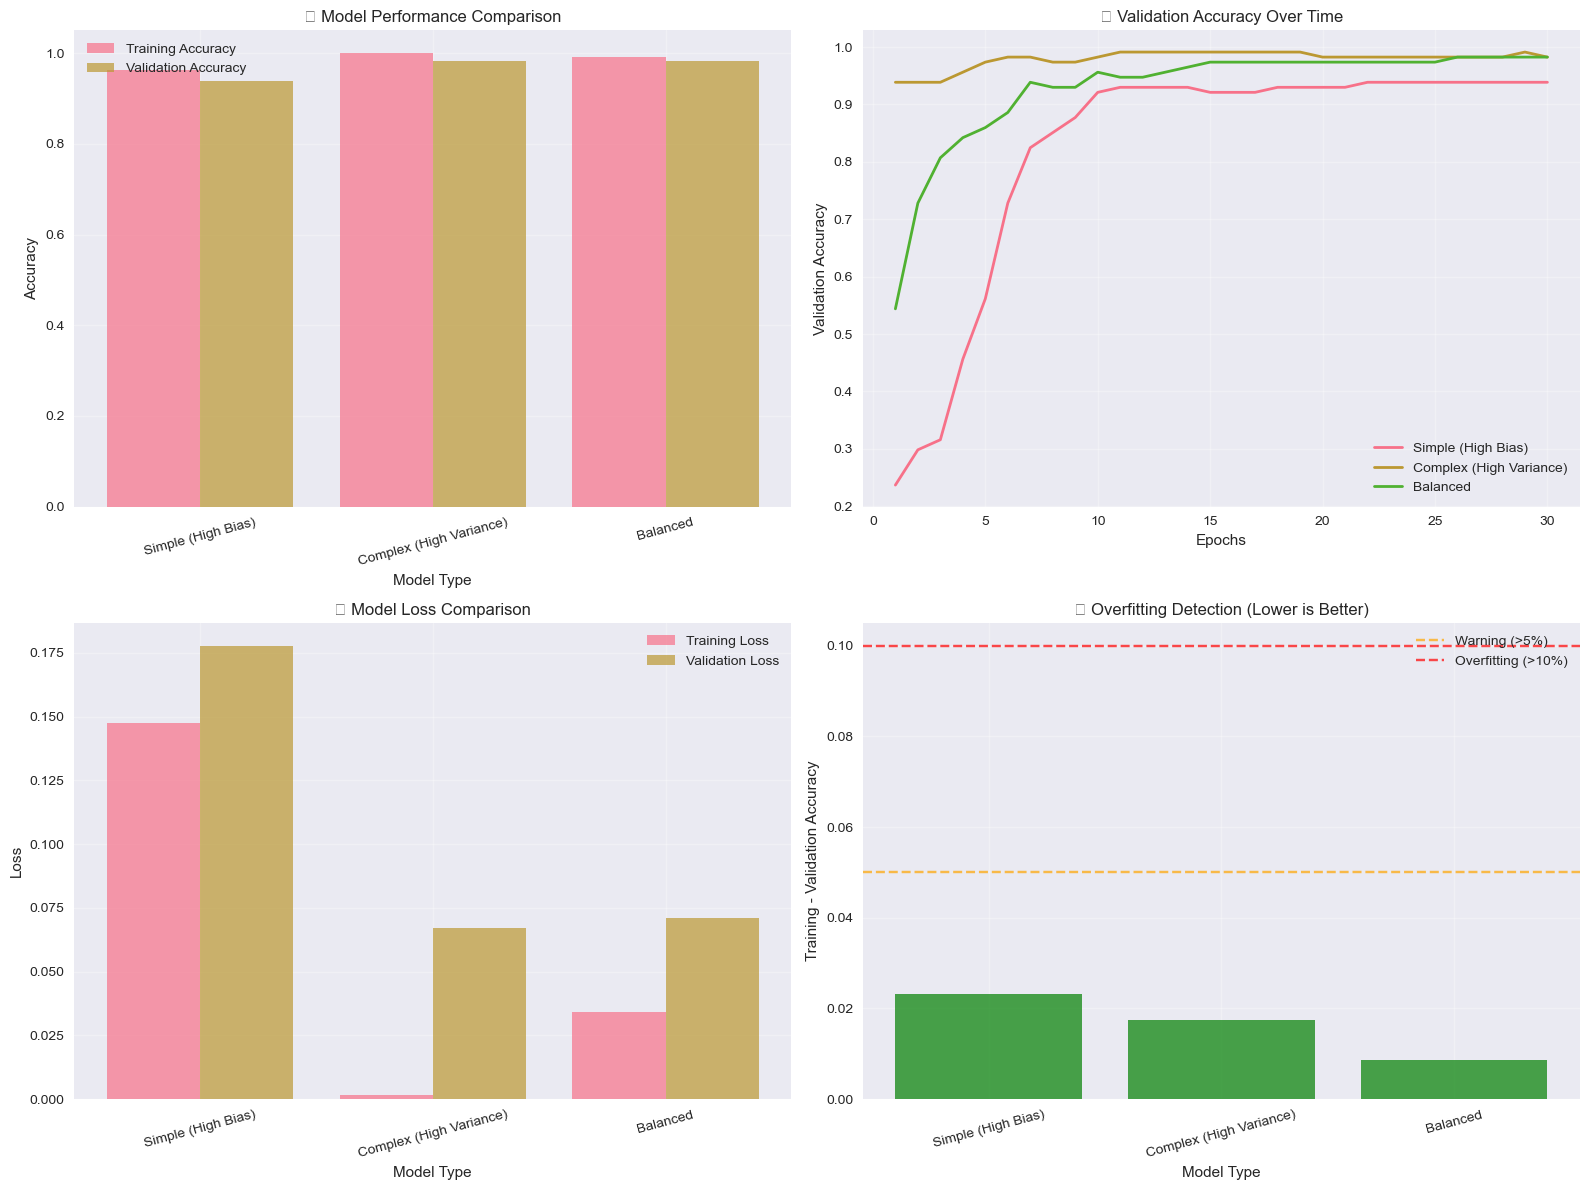

🔍 BIAS-VARIANCE ANALYSIS:

📊 Simple (High Bias):
   Training Accuracy: 0.9619
   Validation Accuracy: 0.9386
   Gap: 0.0233
   🎯 Status: Well-balanced (Good fit)

📊 Complex (High Variance):
   Training Accuracy: 1.0000
   Validation Accuracy: 0.9825
   Gap: 0.0175
   🎯 Status: Well-balanced (Good fit)
   📝 Note: High validation accuracy - excellent performance!

📊 Balanced:
   Training Accuracy: 0.9912
   Validation Accuracy: 0.9825
   Gap: 0.0087
   🎯 Status: Well-balanced (Good fit)
   📝 Note: High validation accuracy - excellent performance!


In [10]:
# Visualize the bias-variance trade-off
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Comparison of final accuracies
model_names = list(results.keys())
train_accs = [results[name]['train_acc'] for name in model_names]
val_accs = [results[name]['val_acc'] for name in model_names]

x_pos = range(len(model_names))
axes[0, 0].bar([p - 0.2 for p in x_pos], train_accs, 0.4, label='Training Accuracy', alpha=0.7)
axes[0, 0].bar([p + 0.2 for p in x_pos], val_accs, 0.4, label='Validation Accuracy', alpha=0.7)
axes[0, 0].set_xlabel('Model Type')
axes[0, 0].set_ylabel('Accuracy')
axes[0, 0].set_title('🎯 Model Performance Comparison')
axes[0, 0].set_xticks(x_pos)
axes[0, 0].set_xticklabels(model_names, rotation=15)
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Training histories comparison
for name, history in histories.items():
    epochs = range(1, len(history.history['accuracy']) + 1)
    axes[0, 1].plot(epochs, history.history['val_accuracy'], label=f'{name}', linewidth=2)

axes[0, 1].set_xlabel('Epochs')
axes[0, 1].set_ylabel('Validation Accuracy')
axes[0, 1].set_title('📈 Validation Accuracy Over Time')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. Loss comparison
train_losses = [results[name]['train_loss'] for name in model_names]
val_losses = [results[name]['val_loss'] for name in model_names]

axes[1, 0].bar([p - 0.2 for p in x_pos], train_losses, 0.4, label='Training Loss', alpha=0.7)
axes[1, 0].bar([p + 0.2 for p in x_pos], val_losses, 0.4, label='Validation Loss', alpha=0.7)
axes[1, 0].set_xlabel('Model Type')
axes[1, 0].set_ylabel('Loss')
axes[1, 0].set_title('📉 Model Loss Comparison')
axes[1, 0].set_xticks(x_pos)
axes[1, 0].set_xticklabels(model_names, rotation=15)
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# 4. Overfitting detection (gap between train and val accuracy)
gaps = [results[name]['train_acc'] - results[name]['val_acc'] for name in model_names]
colors = ['green' if gap < 0.05 else 'orange' if gap < 0.1 else 'red' for gap in gaps]

bars = axes[1, 1].bar(model_names, gaps, color=colors, alpha=0.7)
axes[1, 1].set_xlabel('Model Type')
axes[1, 1].set_ylabel('Training - Validation Accuracy')
axes[1, 1].set_title('🔍 Overfitting Detection (Lower is Better)')
axes[1, 1].tick_params(axis='x', rotation=15)
axes[1, 1].grid(True, alpha=0.3)

# Add threshold lines
axes[1, 1].axhline(y=0.05, color='orange', linestyle='--', alpha=0.7, label='Warning (>5%)')
axes[1, 1].axhline(y=0.1, color='red', linestyle='--', alpha=0.7, label='Overfitting (>10%)')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

# Print detailed analysis
print("🔍 BIAS-VARIANCE ANALYSIS:")
print("=" * 50)

for name in model_names:
    gap = results[name]['train_acc'] - results[name]['val_acc']
    
    print(f"\n📊 {name}:")
    print(f"   Training Accuracy: {results[name]['train_acc']:.4f}")
    print(f"   Validation Accuracy: {results[name]['val_acc']:.4f}")
    print(f"   Gap: {gap:.4f}")
    
    if gap < 0.05:
        print("   🎯 Status: Well-balanced (Good fit)")
    elif gap < 0.1:
        print("   ⚠️  Status: Slight overfitting")
    else:
        print("   🚨 Status: Significant overfitting")
        
    if results[name]['val_acc'] < 0.8:
        print("   📝 Note: Low validation accuracy suggests underfitting")
    elif results[name]['val_acc'] > 0.95:
        print("   📝 Note: High validation accuracy - excellent performance!")

## 6. Implementing Regularization Techniques 🎯

**Regularization** helps prevent overfitting by adding constraints to the model during training.



### 🛡️ Types of Regularization:

1. **L1 Regularization (Lasso)**
   - Adds sum of absolute weights to loss function
   - Promotes sparsity (some weights become exactly 0)
   - Good for feature selection

2. **L2 Regularization (Ridge)**  
   - Adds sum of squared weights to loss function
   - Keeps weights small but not zero
   - Most commonly used

3. **Dropout Regularization**
   - Randomly sets some neurons to 0 during training
   - Prevents neurons from becoming too dependent on each other
   - Very effective for neural networks

Let's implement and compare all three techniques!

In [11]:
# Create models with different regularization techniques
def create_l1_regularized_model(input_dim, l1_strength=0.01):
    """Model with L1 regularization"""
    model = Sequential([
        Dense(64, activation='relu', input_shape=(input_dim,),
              kernel_regularizer=regularizers.l1(l1_strength)),
        Dense(32, activation='relu',
              kernel_regularizer=regularizers.l1(l1_strength)),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

def create_l2_regularized_model(input_dim, l2_strength=0.01):
    """Model with L2 regularization"""
    model = Sequential([
        Dense(64, activation='relu', input_shape=(input_dim,),
              kernel_regularizer=regularizers.l2(l2_strength)),
        Dense(32, activation='relu',
              kernel_regularizer=regularizers.l2(l2_strength)),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

def create_dropout_model(input_dim, dropout_rate=0.3):
    """Model with Dropout regularization"""
    model = Sequential([
        Dense(64, activation='relu', input_shape=(input_dim,)),
        Dropout(dropout_rate),
        Dense(32, activation='relu'),
        Dropout(dropout_rate),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

def create_combined_regularization_model(input_dim, l2_strength=0.01, dropout_rate=0.3):
    """Model combining L2 and Dropout regularization"""
    model = Sequential([
        Dense(64, activation='relu', input_shape=(input_dim,),
              kernel_regularizer=regularizers.l2(l2_strength)),
        Dropout(dropout_rate),
        Dense(32, activation='relu',
              kernel_regularizer=regularizers.l2(l2_strength)),
        Dropout(dropout_rate),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create a baseline overfitting model for comparison
def create_overfitting_model(input_dim):
    """Model prone to overfitting (no regularization)"""
    model = Sequential([
        Dense(128, activation='relu', input_shape=(input_dim,)),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

print("✅ Regularization model functions created!")
print("🎯 Models available:")
print("   • L1 Regularized (Lasso)")
print("   • L2 Regularized (Ridge)")  
print("   • Dropout Regularized")
print("   • Combined (L2 + Dropout)")
print("   • Overfitting Baseline (for comparison)")

✅ Regularization model functions created!
🎯 Models available:
   • L1 Regularized (Lasso)
   • L2 Regularized (Ridge)
   • Dropout Regularized
   • Combined (L2 + Dropout)
   • Overfitting Baseline (for comparison)


In [12]:
# Train all regularization models
regularization_models = {
    'No Regularization': create_overfitting_model(X_train_scaled.shape[1]),
    'L1 Regularization': create_l1_regularized_model(X_train_scaled.shape[1]),
    'L2 Regularization': create_l2_regularized_model(X_train_scaled.shape[1]),
    'Dropout': create_dropout_model(X_train_scaled.shape[1]),
    'L2 + Dropout': create_combined_regularization_model(X_train_scaled.shape[1])
}

reg_results = {}
reg_histories = {}

print("🚀 Training models with different regularization techniques...\n")

for name, model in regularization_models.items():
    print(f"Training {name} model...")
    
    history = model.fit(
        X_train_scaled, y_train,
        epochs=50,
        batch_size=32,
        validation_data=(X_val_scaled, y_val),
        verbose=0
    )
    
    # Store results
    reg_histories[name] = history
    train_loss, train_acc = model.evaluate(X_train_scaled, y_train, verbose=0)
    val_loss, val_acc = model.evaluate(X_val_scaled, y_val, verbose=0)
    
    reg_results[name] = {
        'train_acc': train_acc,
        'val_acc': val_acc,
        'train_loss': train_loss,
        'val_loss': val_loss,
        'overfitting_gap': train_acc - val_acc
    }
    
    print(f"   ✅ Train Acc: {train_acc:.4f}, Val Acc: {val_acc:.4f}, Gap: {train_acc - val_acc:.4f}\n")

print("📊 All regularization models trained!")

🚀 Training models with different regularization techniques...

Training No Regularization model...
   ✅ Train Acc: 1.0000, Val Acc: 0.9649, Gap: 0.0351

Training L1 Regularization model...
   ✅ Train Acc: 1.0000, Val Acc: 0.9649, Gap: 0.0351

Training L1 Regularization model...
   ✅ Train Acc: 0.9883, Val Acc: 0.9737, Gap: 0.0146

Training L2 Regularization model...
   ✅ Train Acc: 0.9883, Val Acc: 0.9737, Gap: 0.0146

Training L2 Regularization model...
   ✅ Train Acc: 0.9883, Val Acc: 0.9825, Gap: 0.0058

Training Dropout model...
   ✅ Train Acc: 0.9883, Val Acc: 0.9825, Gap: 0.0058

Training Dropout model...
   ✅ Train Acc: 0.9971, Val Acc: 0.9825, Gap: 0.0146

Training L2 + Dropout model...
   ✅ Train Acc: 0.9971, Val Acc: 0.9825, Gap: 0.0146

Training L2 + Dropout model...
   ✅ Train Acc: 0.9883, Val Acc: 0.9912, Gap: -0.0030

📊 All regularization models trained!
   ✅ Train Acc: 0.9883, Val Acc: 0.9912, Gap: -0.0030

📊 All regularization models trained!


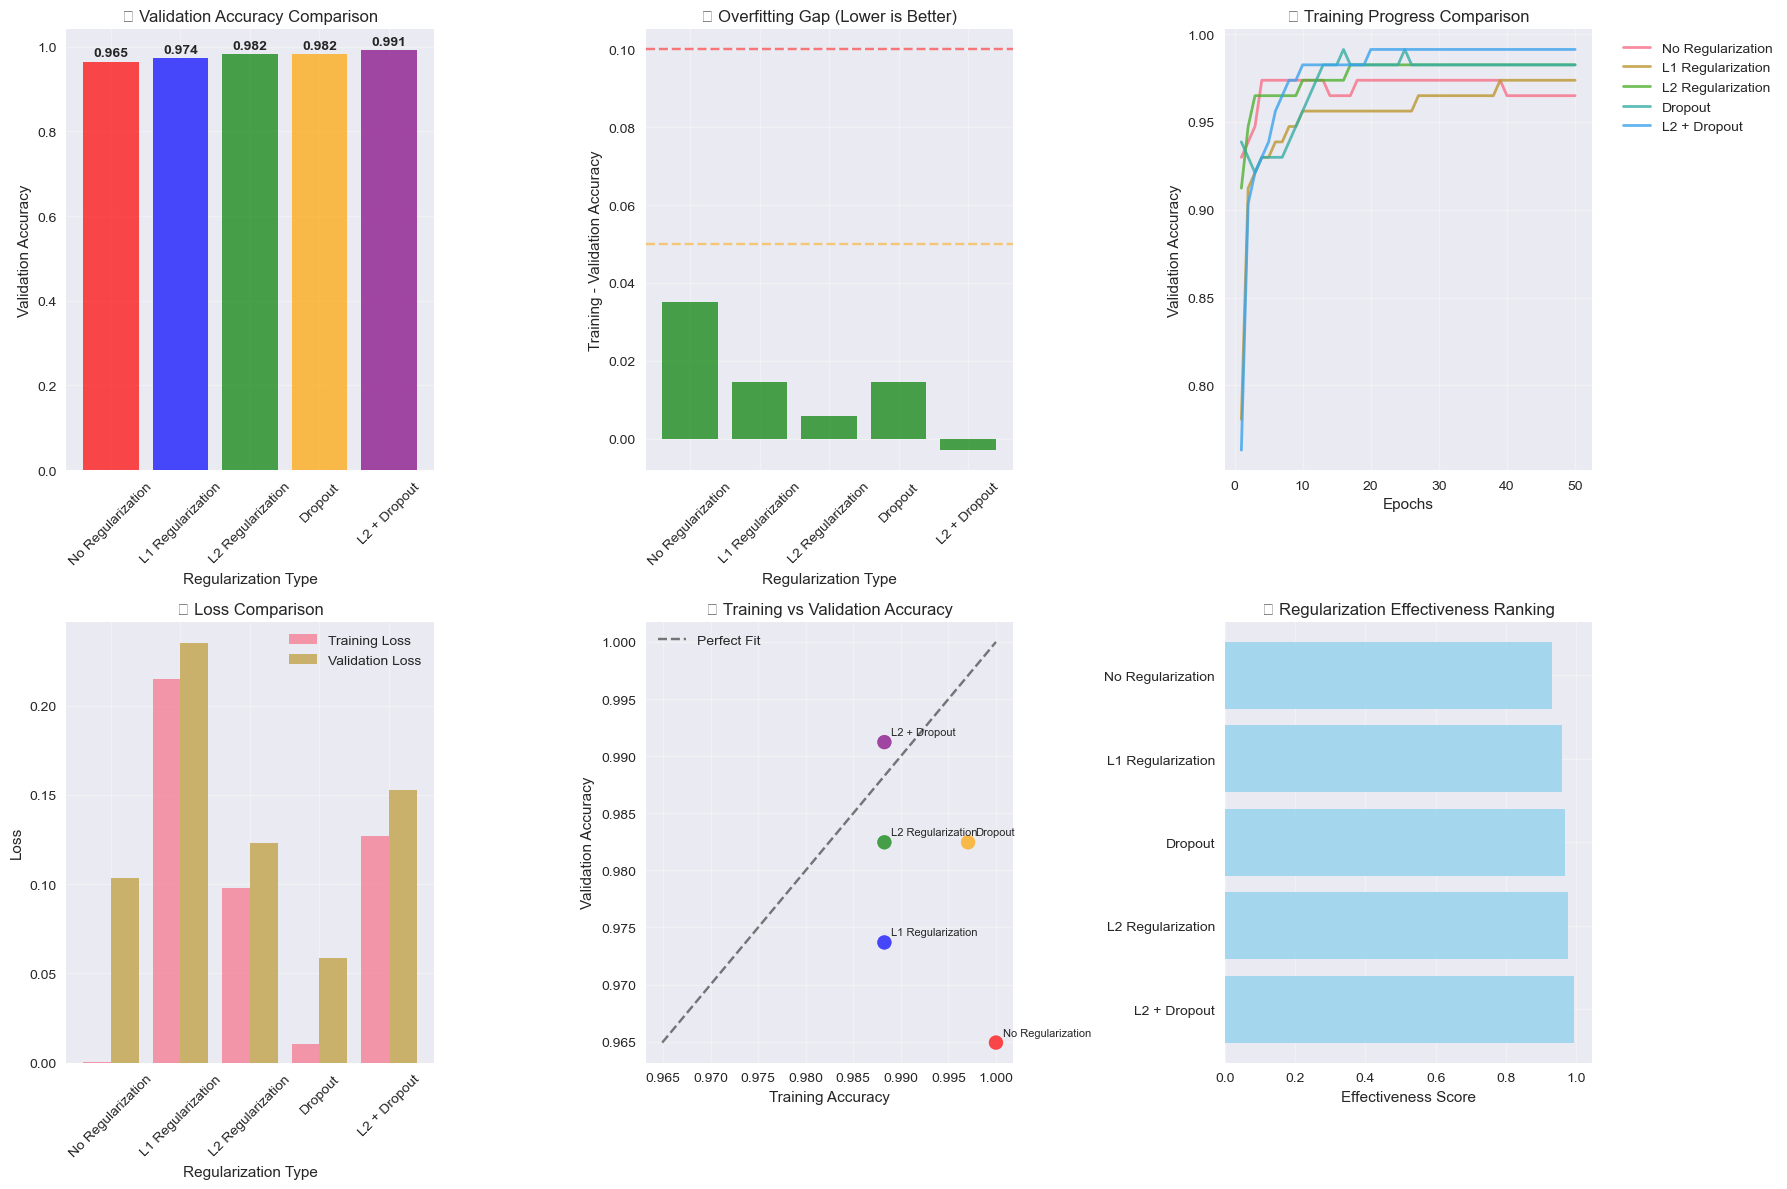

🔍 REGULARIZATION ANALYSIS:

📊 No Regularization:
   Training Accuracy: 1.0000
   Validation Accuracy: 0.9649
   Overfitting Gap: 0.0351
   ✅ Regularization: Good - Minimal overfitting

📊 L1 Regularization:
   Training Accuracy: 0.9883
   Validation Accuracy: 0.9737
   Overfitting Gap: 0.0146
   🎯 Regularization: Excellent - No overfitting

📊 L2 Regularization:
   Training Accuracy: 0.9883
   Validation Accuracy: 0.9825
   Overfitting Gap: 0.0058
   🎯 Regularization: Excellent - No overfitting

📊 Dropout:
   Training Accuracy: 0.9971
   Validation Accuracy: 0.9825
   Overfitting Gap: 0.0146
   🎯 Regularization: Excellent - No overfitting

📊 L2 + Dropout:
   Training Accuracy: 0.9883
   Validation Accuracy: 0.9912
   Overfitting Gap: -0.0030
   🎯 Regularization: Excellent - No overfitting

🏆 BEST REGULARIZATION METHOD: L2 + Dropout
🎯 This method achieved the best balance of high validation accuracy and low overfitting!


In [13]:
# Visualize regularization effectiveness
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. Validation accuracy comparison
model_names = list(reg_results.keys())
val_accs = [reg_results[name]['val_acc'] for name in model_names]

bars = axes[0, 0].bar(model_names, val_accs, color=['red', 'blue', 'green', 'orange', 'purple'], alpha=0.7)
axes[0, 0].set_xlabel('Regularization Type')
axes[0, 0].set_ylabel('Validation Accuracy')
axes[0, 0].set_title('🎯 Validation Accuracy Comparison')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(True, alpha=0.3)

# Add value labels on bars
for bar, val in zip(bars, val_accs):
    height = bar.get_height()
    axes[0, 0].text(bar.get_x() + bar.get_width()/2., height + 0.005,
                   f'{val:.3f}', ha='center', va='bottom', fontweight='bold')

# 2. Overfitting gap comparison
gaps = [reg_results[name]['overfitting_gap'] for name in model_names]
colors = ['red' if gap > 0.1 else 'orange' if gap > 0.05 else 'green' for gap in gaps]

bars = axes[0, 1].bar(model_names, gaps, color=colors, alpha=0.7)
axes[0, 1].set_xlabel('Regularization Type')
axes[0, 1].set_ylabel('Training - Validation Accuracy')
axes[0, 1].set_title('🔍 Overfitting Gap (Lower is Better)')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].axhline(y=0.05, color='orange', linestyle='--', alpha=0.5)
axes[0, 1].axhline(y=0.1, color='red', linestyle='--', alpha=0.5)
axes[0, 1].grid(True, alpha=0.3)

# 3. Training curves comparison
for name, history in reg_histories.items():
    epochs = range(1, len(history.history['val_accuracy']) + 1)
    axes[0, 2].plot(epochs, history.history['val_accuracy'], 
                   label=name, linewidth=2, alpha=0.8)

axes[0, 2].set_xlabel('Epochs')
axes[0, 2].set_ylabel('Validation Accuracy')
axes[0, 2].set_title('📈 Training Progress Comparison')
axes[0, 2].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0, 2].grid(True, alpha=0.3)

# 4. Loss comparison
train_losses = [reg_results[name]['train_loss'] for name in model_names]
val_losses = [reg_results[name]['val_loss'] for name in model_names]

x_pos = range(len(model_names))
axes[1, 0].bar([p - 0.2 for p in x_pos], train_losses, 0.4, label='Training Loss', alpha=0.7)
axes[1, 0].bar([p + 0.2 for p in x_pos], val_losses, 0.4, label='Validation Loss', alpha=0.7)
axes[1, 0].set_xlabel('Regularization Type')
axes[1, 0].set_ylabel('Loss')
axes[1, 0].set_title('📉 Loss Comparison')
axes[1, 0].set_xticks(x_pos)
axes[1, 0].set_xticklabels(model_names, rotation=45)
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# 5. Training vs Validation accuracy scatter plot
train_accs = [reg_results[name]['train_acc'] for name in model_names]

axes[1, 1].scatter(train_accs, val_accs, 
                  s=100, alpha=0.7, c=['red', 'blue', 'green', 'orange', 'purple'])

for i, name in enumerate(model_names):
    axes[1, 1].annotate(name, (train_accs[i], val_accs[i]), 
                       xytext=(5, 5), textcoords='offset points', fontsize=8)

# Add diagonal line (perfect fit)
min_acc = min(min(train_accs), min(val_accs))
max_acc = max(max(train_accs), max(val_accs))
axes[1, 1].plot([min_acc, max_acc], [min_acc, max_acc], 'k--', alpha=0.5, label='Perfect Fit')

axes[1, 1].set_xlabel('Training Accuracy')
axes[1, 1].set_ylabel('Validation Accuracy')
axes[1, 1].set_title('🎯 Training vs Validation Accuracy')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

# 6. Regularization effectiveness ranking
effectiveness_scores = [(1 - gap) * val_acc for gap, val_acc in zip(gaps, val_accs)]
sorted_models = sorted(zip(model_names, effectiveness_scores), key=lambda x: x[1], reverse=True)

ranked_names, ranked_scores = zip(*sorted_models)
bars = axes[1, 2].barh(ranked_names, ranked_scores, color='skyblue', alpha=0.7)
axes[1, 2].set_xlabel('Effectiveness Score')
axes[1, 2].set_title('🏆 Regularization Effectiveness Ranking')
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print detailed analysis
print("🔍 REGULARIZATION ANALYSIS:")
print("=" * 60)

for name in model_names:
    result = reg_results[name]
    print(f"\n📊 {name}:")
    print(f"   Training Accuracy: {result['train_acc']:.4f}")
    print(f"   Validation Accuracy: {result['val_acc']:.4f}")
    print(f"   Overfitting Gap: {result['overfitting_gap']:.4f}")
    
    if result['overfitting_gap'] < 0.03:
        print("   🎯 Regularization: Excellent - No overfitting")
    elif result['overfitting_gap'] < 0.05:
        print("   ✅ Regularization: Good - Minimal overfitting")
    elif result['overfitting_gap'] < 0.1:
        print("   ⚠️  Regularization: Moderate - Some overfitting")
    else:
        print("   🚨 Regularization: Poor - Significant overfitting")

print(f"\n🏆 BEST REGULARIZATION METHOD: {ranked_names[0]}")
print(f"🎯 This method achieved the best balance of high validation accuracy and low overfitting!")

## 7. Optimization Algorithms Comparison ⚡

**Optimization algorithms** determine how the neural network learns by updating weights during training.

<img src="https://miro.medium.com/v2/resize:fit:1400/1*f2OUVPlulPz8QdLa9LzS8g.gif" width="600" alt="Optimization Algorithms Visualization">

### 🎯 Popular Optimization Algorithms:

| Algorithm | Description | Best For | Learning Rate |
|-----------|-------------|----------|---------------|
| **SGD** | Basic gradient descent | Simple problems | Need manual tuning |
| **SGD + Momentum** | SGD with momentum | Escaping local minima | More stable |  
| **RMSprop** | Adaptive learning rates | RNNs, varied gradients | Self-adjusting |
| **Adam** | Combines momentum + RMSprop | Most problems (default choice) | Self-adjusting |
| **AdamW** | Adam with weight decay | Large models, regularization | Self-adjusting |

### 🔍 How they work:
- **SGD**: Basic gradient descent - can be slow and get stuck
- **Momentum**: Builds momentum in consistent direction, faster convergence  
- **RMSprop**: Adapts learning rate per parameter based on recent gradients
- **Adam**: Combines benefits of momentum and RMSprop - usually best choice!

In [14]:
# Create models with different optimizers
def create_optimizer_model(input_dim, optimizer):
    """Create model with specified optimizer"""
    model = Sequential([
        Dense(32, activation='relu', input_shape=(input_dim,)),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    
    model.compile(
        optimizer=optimizer,
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    
    return model

# Define different optimizers to test
optimizers_to_test = {
    'SGD': optimizers.SGD(learning_rate=0.01),
    'SGD + Momentum': optimizers.SGD(learning_rate=0.01, momentum=0.9),
    'RMSprop': optimizers.RMSprop(learning_rate=0.001),
    'Adam': optimizers.Adam(learning_rate=0.001),
    'AdamW': optimizers.AdamW(learning_rate=0.001)
}

optimizer_results = {}
optimizer_histories = {}

print("🚀 Training models with different optimizers...\n")

# Train models with different optimizers
for name, optimizer in optimizers_to_test.items():
    print(f"Training with {name} optimizer...")
    
    # Create fresh model for each optimizer
    model = create_optimizer_model(X_train_scaled.shape[1], optimizer)
    
    # Train model
    history = model.fit(
        X_train_scaled, y_train,
        epochs=40,
        batch_size=32,
        validation_data=(X_val_scaled, y_val),
        verbose=0
    )
    
    # Store results
    optimizer_histories[name] = history
    train_loss, train_acc = model.evaluate(X_train_scaled, y_train, verbose=0)
    val_loss, val_acc = model.evaluate(X_val_scaled, y_val, verbose=0)
    
    optimizer_results[name] = {
        'train_acc': train_acc,
        'val_acc': val_acc,
        'train_loss': train_loss,
        'val_loss': val_loss,
        'final_epoch': len(history.history['accuracy']),
        'convergence_speed': None  # We'll calculate this next
    }
    
    # Calculate convergence speed (epoch to reach 90% of final validation accuracy)
    val_acc_history = history.history['val_accuracy']
    target_acc = val_acc * 0.9
    
    convergence_epoch = len(val_acc_history)  # Default to last epoch
    for epoch, acc in enumerate(val_acc_history):
        if acc >= target_acc:
            convergence_epoch = epoch + 1
            break
    
    optimizer_results[name]['convergence_speed'] = convergence_epoch
    
    print(f"   ✅ Final Val Acc: {val_acc:.4f}, Convergence: {convergence_epoch} epochs\n")

print("📊 All optimizers tested!")

🚀 Training models with different optimizers...

Training with SGD optimizer...
   ✅ Final Val Acc: 0.9561, Convergence: 2 epochs

Training with SGD + Momentum optimizer...
   ✅ Final Val Acc: 0.9561, Convergence: 2 epochs

Training with SGD + Momentum optimizer...
   ✅ Final Val Acc: 0.9737, Convergence: 2 epochs

Training with RMSprop optimizer...
   ✅ Final Val Acc: 0.9737, Convergence: 2 epochs

Training with RMSprop optimizer...
   ✅ Final Val Acc: 0.9737, Convergence: 1 epochs

Training with Adam optimizer...
   ✅ Final Val Acc: 0.9737, Convergence: 1 epochs

Training with Adam optimizer...
   ✅ Final Val Acc: 0.9825, Convergence: 2 epochs

Training with AdamW optimizer...
   ✅ Final Val Acc: 0.9825, Convergence: 2 epochs

Training with AdamW optimizer...
   ✅ Final Val Acc: 0.9737, Convergence: 3 epochs

📊 All optimizers tested!
   ✅ Final Val Acc: 0.9737, Convergence: 3 epochs

📊 All optimizers tested!


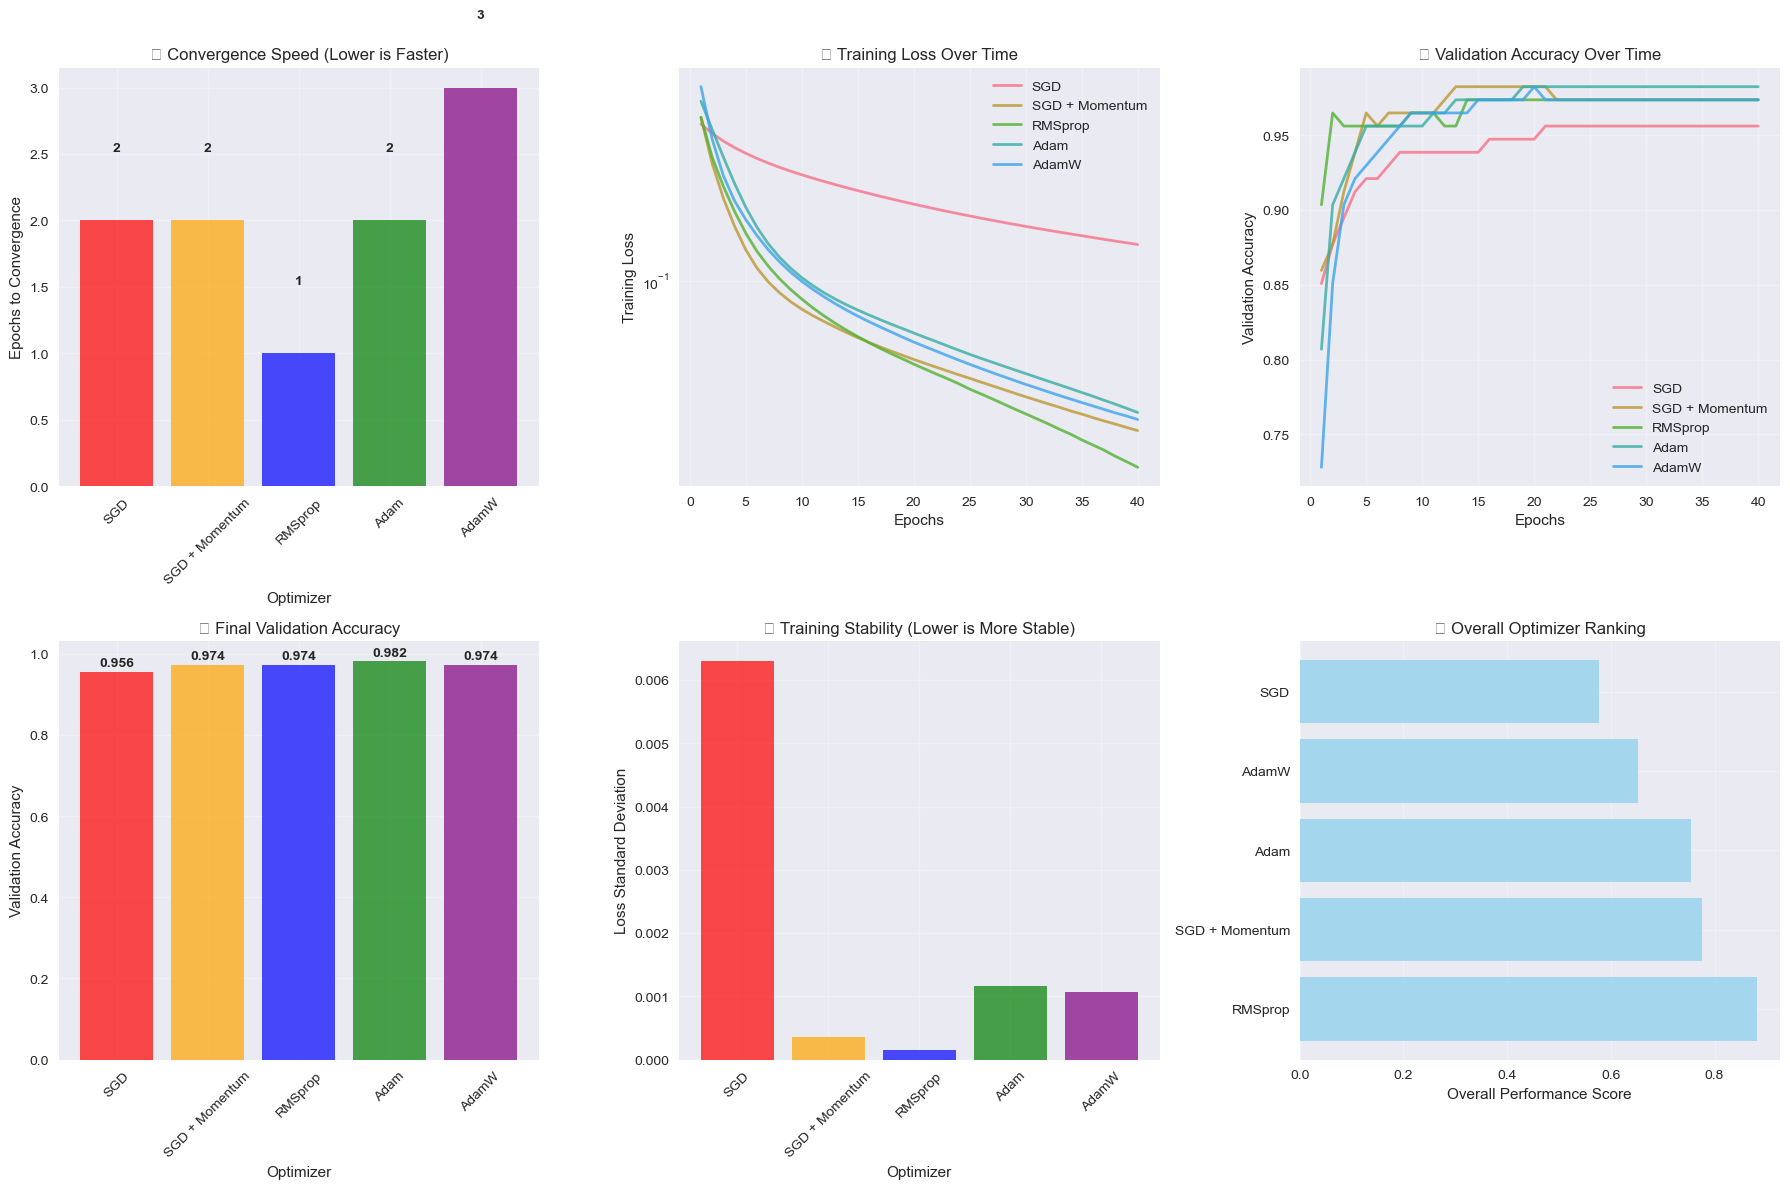

🔍 OPTIMIZER ANALYSIS:

⚡ SGD:
   Final Validation Accuracy: 0.9561
   Convergence Speed: 2 epochs
   Training Stability: 0.0063
   📊 Performance: Excellent accuracy, Fast convergence

⚡ SGD + Momentum:
   Final Validation Accuracy: 0.9737
   Convergence Speed: 2 epochs
   Training Stability: 0.0004
   📊 Performance: Excellent accuracy, Fast convergence

⚡ RMSprop:
   Final Validation Accuracy: 0.9737
   Convergence Speed: 1 epochs
   Training Stability: 0.0001
   📊 Performance: Excellent accuracy, Fast convergence

⚡ Adam:
   Final Validation Accuracy: 0.9825
   Convergence Speed: 2 epochs
   Training Stability: 0.0012
   📊 Performance: Excellent accuracy, Fast convergence

⚡ AdamW:
   Final Validation Accuracy: 0.9737
   Convergence Speed: 3 epochs
   Training Stability: 0.0011
   📊 Performance: Excellent accuracy, Fast convergence

🏆 BEST OPTIMIZER: RMSprop
🎯 Best balance of accuracy, speed, and stability!

💡 OPTIMIZER RECOMMENDATIONS:
   🥇 For most problems: Adam (good all-around pe

In [15]:
# Visualize optimizer comparison
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. Convergence speed comparison  
opt_names = list(optimizer_results.keys())
convergence_speeds = [optimizer_results[name]['convergence_speed'] for name in opt_names]

bars = axes[0, 0].bar(opt_names, convergence_speeds, 
                     color=['red', 'orange', 'blue', 'green', 'purple'], alpha=0.7)
axes[0, 0].set_xlabel('Optimizer')
axes[0, 0].set_ylabel('Epochs to Convergence')
axes[0, 0].set_title('⚡ Convergence Speed (Lower is Faster)')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(True, alpha=0.3)

# Add value labels
for bar, speed in zip(bars, convergence_speeds):
    height = bar.get_height()
    axes[0, 0].text(bar.get_x() + bar.get_width()/2., height + 0.5,
                   f'{speed}', ha='center', va='bottom', fontweight='bold')

# 2. Training curves - Loss
for name, history in optimizer_histories.items():
    epochs = range(1, len(history.history['loss']) + 1)
    axes[0, 1].plot(epochs, history.history['loss'], label=name, linewidth=2, alpha=0.8)

axes[0, 1].set_xlabel('Epochs')
axes[0, 1].set_ylabel('Training Loss')
axes[0, 1].set_title('📉 Training Loss Over Time')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].set_yscale('log')  # Log scale to see differences better

# 3. Training curves - Validation Accuracy  
for name, history in optimizer_histories.items():
    epochs = range(1, len(history.history['val_accuracy']) + 1)
    axes[0, 2].plot(epochs, history.history['val_accuracy'], label=name, linewidth=2, alpha=0.8)

axes[0, 2].set_xlabel('Epochs')
axes[0, 2].set_ylabel('Validation Accuracy')
axes[0, 2].set_title('📈 Validation Accuracy Over Time')
axes[0, 2].legend()
axes[0, 2].grid(True, alpha=0.3)

# 4. Final performance comparison
val_accs = [optimizer_results[name]['val_acc'] for name in opt_names]

bars = axes[1, 0].bar(opt_names, val_accs, 
                     color=['red', 'orange', 'blue', 'green', 'purple'], alpha=0.7)
axes[1, 0].set_xlabel('Optimizer')
axes[1, 0].set_ylabel('Validation Accuracy')
axes[1, 0].set_title('🎯 Final Validation Accuracy')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].grid(True, alpha=0.3)

# Add value labels
for bar, acc in zip(bars, val_accs):
    height = bar.get_height()
    axes[1, 0].text(bar.get_x() + bar.get_width()/2., height + 0.005,
                   f'{acc:.3f}', ha='center', va='bottom', fontweight='bold')

# 5. Training stability (loss variance in last 10 epochs)
stabilities = []
for name, history in optimizer_histories.items():
    last_10_losses = history.history['val_loss'][-10:]
    stability = np.std(last_10_losses)  # Lower std = more stable
    stabilities.append(stability)

bars = axes[1, 1].bar(opt_names, stabilities, 
                     color=['red', 'orange', 'blue', 'green', 'purple'], alpha=0.7)
axes[1, 1].set_xlabel('Optimizer')
axes[1, 1].set_ylabel('Loss Standard Deviation')
axes[1, 1].set_title('🎢 Training Stability (Lower is More Stable)')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].grid(True, alpha=0.3)

# 6. Overall performance score (combination of accuracy, speed, stability)
# Score = accuracy * (1 / normalized_convergence_time) * (1 / normalized_stability)
max_convergence = max(convergence_speeds)
max_stability = max(stabilities)

overall_scores = []
for i, name in enumerate(opt_names):
    acc_score = val_accs[i]
    speed_score = 1 - (convergence_speeds[i] / max_convergence)  # Faster is better
    stability_score = 1 - (stabilities[i] / max_stability) if max_stability > 0 else 1  # More stable is better
    
    # Weighted combination
    overall_score = (acc_score * 0.5 + speed_score * 0.3 + stability_score * 0.2)
    overall_scores.append(overall_score)

# Sort by overall score
sorted_opts = sorted(zip(opt_names, overall_scores), key=lambda x: x[1], reverse=True)
sorted_names, sorted_scores = zip(*sorted_opts)

bars = axes[1, 2].barh(sorted_names, sorted_scores, color='skyblue', alpha=0.7)
axes[1, 2].set_xlabel('Overall Performance Score')
axes[1, 2].set_title('🏆 Overall Optimizer Ranking')
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print detailed analysis
print("🔍 OPTIMIZER ANALYSIS:")
print("=" * 60)

for name in opt_names:
    result = optimizer_results[name]
    print(f"\n⚡ {name}:")
    print(f"   Final Validation Accuracy: {result['val_acc']:.4f}")
    print(f"   Convergence Speed: {result['convergence_speed']} epochs")
    print(f"   Training Stability: {stabilities[opt_names.index(name)]:.4f}")
    
    # Performance assessment
    if result['val_acc'] > 0.95:
        acc_assessment = "Excellent"
    elif result['val_acc'] > 0.90:
        acc_assessment = "Good"
    else:
        acc_assessment = "Moderate"
    
    if result['convergence_speed'] < 10:
        speed_assessment = "Fast"
    elif result['convergence_speed'] < 20:
        speed_assessment = "Moderate"
    else:
        speed_assessment = "Slow"
    
    print(f"   📊 Performance: {acc_assessment} accuracy, {speed_assessment} convergence")

print(f"\n🏆 BEST OPTIMIZER: {sorted_names[0]}")
print(f"🎯 Best balance of accuracy, speed, and stability!")

print(f"\n💡 OPTIMIZER RECOMMENDATIONS:")
print(f"   🥇 For most problems: Adam (good all-around performance)")
print(f"   🥈 For simple problems: SGD + Momentum (reliable and interpretable)")  
print(f"   🥉 For RNNs/sequences: RMSprop (handles varying gradients well)")
print(f"   🏅 For large models: AdamW (better regularization)")

## 8. Weight Initialization Strategies 🎲

**Weight initialization** is crucial for neural network training. Poor initialization can lead to vanishing/exploding gradients and slow convergence.



### 🎯 Popular Initialization Methods:

| Method | Formula | Best For | Key Idea |
|--------|---------|----------|----------|
| **Random Uniform** | Uniform(-0.1, 0.1) | Simple networks | Basic random values |
| **Xavier/Glorot** | Normal(0, √(2/(fan_in + fan_out))) | Sigmoid/Tanh | Maintains variance across layers |
| **He Normal** | Normal(0, √(2/fan_in)) | ReLU activations | Accounts for ReLU killing half the neurons |
| **LeCun Normal** | Normal(0, √(1/fan_in)) | SELU activations | Designed for self-normalizing networks |

### 🔬 Why it matters:
- **Poor initialization** → Gradients vanish/explode → No learning
- **Good initialization** → Stable gradients → Fast convergence
- **Right method** depends on activation function!

In [16]:
# Create models with different weight initialization strategies
def create_model_with_init(input_dim, init_method):
    """Create model with specified weight initialization"""
    model = Sequential([
        Dense(64, activation='relu', input_shape=(input_dim,),
              kernel_initializer=init_method),
        Dense(32, activation='relu', 
              kernel_initializer=init_method),
        Dense(16, activation='relu',
              kernel_initializer=init_method),
        Dense(1, activation='sigmoid',
              kernel_initializer=init_method)
    ])
    
    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    
    return model

# Define initialization methods to test
init_methods = {
    'Random Uniform': initializers.RandomUniform(minval=-0.1, maxval=0.1),
    'Zeros': initializers.Zeros(),
    'Xavier/Glorot Normal': initializers.GlorotNormal(),
    'Xavier/Glorot Uniform': initializers.GlorotUniform(),
    'He Normal': initializers.HeNormal(),
    'He Uniform': initializers.HeUniform(),
    'LeCun Normal': initializers.LecunNormal()
}

init_results = {}
init_histories = {}

print("🚀 Testing different weight initialization methods...\n")

for name, init_method in init_methods.items():
    print(f"Training with {name} initialization...")
    
    try:
        # Create model with specific initialization
        model = create_model_with_init(X_train_scaled.shape[1], init_method)
        
        # Train model
        history = model.fit(
            X_train_scaled, y_train,
            epochs=30,
            batch_size=32,
            validation_data=(X_val_scaled, y_val),
            verbose=0
        )
        
        # Store results
        init_histories[name] = history
        train_loss, train_acc = model.evaluate(X_train_scaled, y_train, verbose=0)
        val_loss, val_acc = model.evaluate(X_val_scaled, y_val, verbose=0)
        
        # Check for convergence issues
        final_loss = history.history['loss'][-1]
        converged = not (np.isnan(final_loss) or np.isinf(final_loss))
        
        init_results[name] = {
            'train_acc': train_acc,
            'val_acc': val_acc,
            'train_loss': train_loss,
            'val_loss': val_loss,
            'converged': converged,
            'convergence_speed': None
        }
        
        # Calculate convergence speed (epochs to reach decent accuracy)
        val_acc_history = history.history['val_accuracy']
        target_acc = 0.8  # Target accuracy threshold
        
        convergence_epoch = len(val_acc_history)
        for epoch, acc in enumerate(val_acc_history):
            if acc >= target_acc:
                convergence_epoch = epoch + 1
                break
        
        init_results[name]['convergence_speed'] = convergence_epoch
        
        if converged:
            print(f"   ✅ Converged! Val Acc: {val_acc:.4f}, Speed: {convergence_epoch} epochs")
        else:
            print(f"   ❌ Failed to converge (NaN/Inf loss)")
            
    except Exception as e:
        print(f"   ❌ Error during training: {str(e)}")
        init_results[name] = {
            'train_acc': 0.0,
            'val_acc': 0.0,
            'train_loss': float('inf'),
            'val_loss': float('inf'),
            'converged': False,
            'convergence_speed': float('inf')
        }
    
    print()

print("📊 All initialization methods tested!")

🚀 Testing different weight initialization methods...

Training with Random Uniform initialization...
   ✅ Converged! Val Acc: 0.9737, Speed: 3 epochs

Training with Zeros initialization...
   ✅ Converged! Val Acc: 0.9737, Speed: 3 epochs

Training with Zeros initialization...
   ✅ Converged! Val Acc: 0.6228, Speed: 30 epochs

Training with Xavier/Glorot Normal initialization...
   ✅ Converged! Val Acc: 0.6228, Speed: 30 epochs

Training with Xavier/Glorot Normal initialization...
   ✅ Converged! Val Acc: 0.9649, Speed: 1 epochs

Training with Xavier/Glorot Uniform initialization...
   ✅ Converged! Val Acc: 0.9649, Speed: 1 epochs

Training with Xavier/Glorot Uniform initialization...
   ✅ Converged! Val Acc: 0.9825, Speed: 1 epochs

Training with He Normal initialization...
   ✅ Converged! Val Acc: 0.9825, Speed: 1 epochs

Training with He Normal initialization...
   ✅ Converged! Val Acc: 0.9912, Speed: 1 epochs

Training with He Uniform initialization...
   ✅ Converged! Val Acc: 0.991

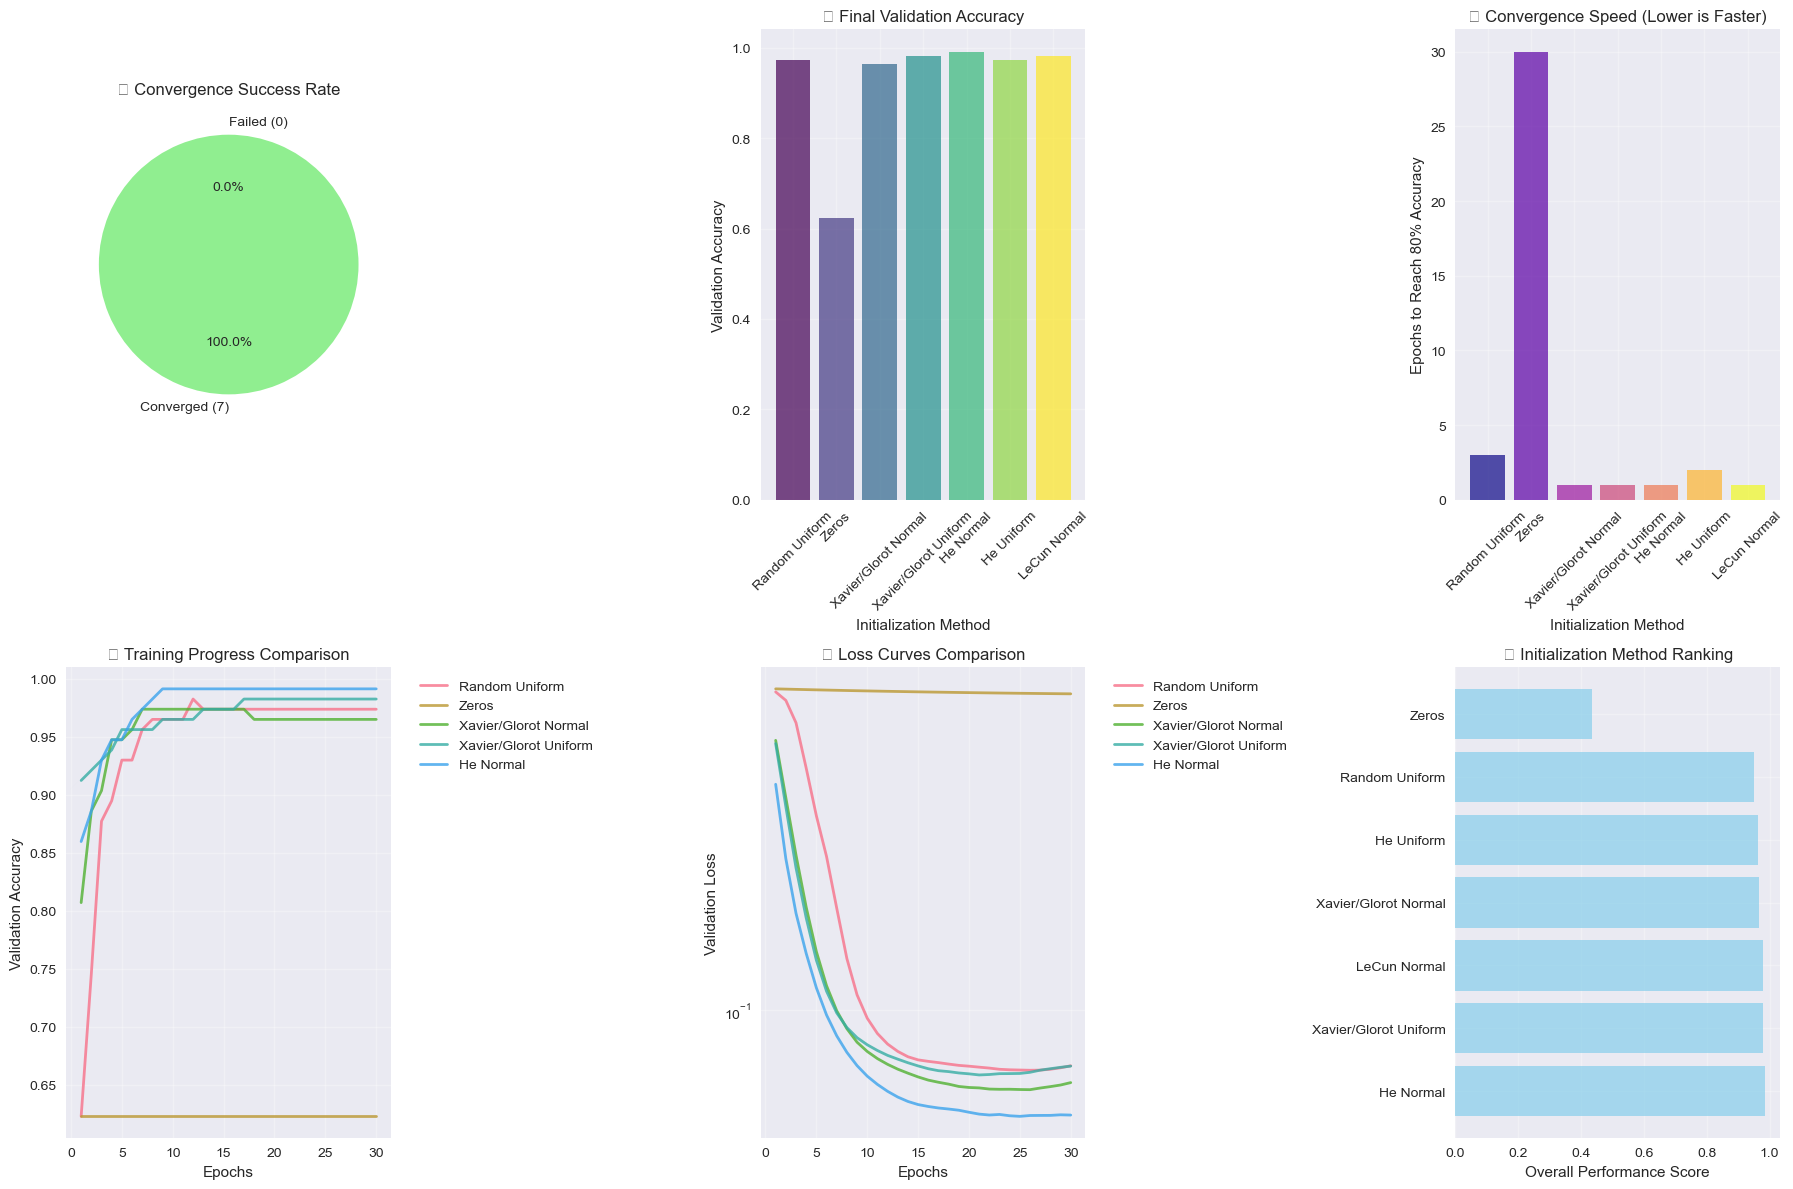

🔍 WEIGHT INITIALIZATION ANALYSIS:

🏆 EXCELLENT METHODS (Val Acc >= 95%):
   • Random Uniform: 0.9737 accuracy, 3 epochs
   • Xavier/Glorot Normal: 0.9649 accuracy, 1 epochs
   • Xavier/Glorot Uniform: 0.9825 accuracy, 1 epochs
   • He Normal: 0.9912 accuracy, 1 epochs
   • He Uniform: 0.9737 accuracy, 2 epochs
   • LeCun Normal: 0.9825 accuracy, 1 epochs

✅ GOOD METHODS (Val Acc >= 85%):

❌ POOR METHODS (Val Acc < 85% or failed):
   • Zeros: 0.6228 accuracy (poor performance)

💡 INITIALIZATION RECOMMENDATIONS:
   🎯 For ReLU networks: He Normal/Uniform (designed for ReLU)
   🎯 For Sigmoid/Tanh networks: Xavier/Glorot Normal/Uniform
   🎯 For SELU networks: LeCun Normal
   🚫 Avoid: Zero initialization (breaks symmetry), Random uniform (often poor)
   📚 Default choice: He Normal (works well with most modern networks)

🏆 TOP PERFORMER: Random Uniform
   This initialization method achieved the best combination of accuracy and speed!


In [17]:
# Visualize initialization method comparison
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Filter out methods that failed to converge for cleaner visualization
converged_methods = {name: result for name, result in init_results.items() 
                    if result['converged'] and result['val_acc'] > 0.5}

conv_names = list(converged_methods.keys())
if not conv_names:  # Fallback if no methods converged well
    conv_names = list(init_results.keys())
    converged_methods = init_results

# 1. Convergence Success Rate
total_methods = len(init_results)
converged_count = sum(1 for result in init_results.values() if result['converged'])
failed_count = total_methods - converged_count

axes[0, 0].pie([converged_count, failed_count], 
              labels=[f'Converged ({converged_count})', f'Failed ({failed_count})'],
              autopct='%1.1f%%', startangle=90, 
              colors=['lightgreen', 'lightcoral'])
axes[0, 0].set_title('🎯 Convergence Success Rate')

# 2. Final validation accuracy for converged methods
if conv_names:
    val_accs = [converged_methods[name]['val_acc'] for name in conv_names]
    
    bars = axes[0, 1].bar(conv_names, val_accs, alpha=0.7, 
                         color=plt.cm.viridis(np.linspace(0, 1, len(conv_names))))
    axes[0, 1].set_xlabel('Initialization Method')
    axes[0, 1].set_ylabel('Validation Accuracy')
    axes[0, 1].set_title('📊 Final Validation Accuracy')
    axes[0, 1].tick_params(axis='x', rotation=45)
    axes[0, 1].grid(True, alpha=0.3)

# 3. Convergence speed comparison
if conv_names:
    speeds = [converged_methods[name]['convergence_speed'] for name in conv_names]
    
    bars = axes[0, 2].bar(conv_names, speeds, alpha=0.7,
                         color=plt.cm.plasma(np.linspace(0, 1, len(conv_names))))
    axes[0, 2].set_xlabel('Initialization Method')
    axes[0, 2].set_ylabel('Epochs to Reach 80% Accuracy')
    axes[0, 2].set_title('⚡ Convergence Speed (Lower is Faster)')
    axes[0, 2].tick_params(axis='x', rotation=45)
    axes[0, 2].grid(True, alpha=0.3)

# 4. Training curves for successful methods
successful_histories = {name: hist for name, hist in init_histories.items() 
                       if name in conv_names}

if successful_histories:
    for name, history in list(successful_histories.items())[:5]:  # Limit to 5 for clarity
        epochs = range(1, len(history.history['val_accuracy']) + 1)
        axes[1, 0].plot(epochs, history.history['val_accuracy'], 
                       label=name, linewidth=2, alpha=0.8)
    
    axes[1, 0].set_xlabel('Epochs')
    axes[1, 0].set_ylabel('Validation Accuracy')
    axes[1, 0].set_title('📈 Training Progress Comparison')
    axes[1, 0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    axes[1, 0].grid(True, alpha=0.3)

# 5. Loss curves for successful methods  
if successful_histories:
    for name, history in list(successful_histories.items())[:5]:
        epochs = range(1, len(history.history['val_loss']) + 1)
        axes[1, 1].plot(epochs, history.history['val_loss'], 
                       label=name, linewidth=2, alpha=0.8)
    
    axes[1, 1].set_xlabel('Epochs')
    axes[1, 1].set_ylabel('Validation Loss')
    axes[1, 1].set_title('📉 Loss Curves Comparison')
    axes[1, 1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    axes[1, 1].grid(True, alpha=0.3)
    axes[1, 1].set_yscale('log')

# 6. Overall ranking
if conv_names:
    # Calculate overall scores (accuracy weighted by speed)
    overall_scores = []
    max_speed = max(converged_methods[name]['convergence_speed'] for name in conv_names)
    
    for name in conv_names:
        acc = converged_methods[name]['val_acc']
        speed = converged_methods[name]['convergence_speed']
        speed_score = 1 - (speed / max_speed)  # Normalize speed (higher is better)
        overall_score = acc * 0.7 + speed_score * 0.3  # Weight accuracy more
        overall_scores.append(overall_score)
    
    # Sort by overall score
    sorted_inits = sorted(zip(conv_names, overall_scores), key=lambda x: x[1], reverse=True)
    sorted_names, sorted_scores = zip(*sorted_inits)
    
    bars = axes[1, 2].barh(sorted_names, sorted_scores, alpha=0.7, color='skyblue')
    axes[1, 2].set_xlabel('Overall Performance Score')
    axes[1, 2].set_title('🏆 Initialization Method Ranking')
    axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print detailed analysis
print("🔍 WEIGHT INITIALIZATION ANALYSIS:")
print("=" * 60)

# Group methods by performance
excellent_methods = []
good_methods = []
poor_methods = []

for name, result in init_results.items():
    if not result['converged']:
        poor_methods.append(name)
    elif result['val_acc'] >= 0.95:
        excellent_methods.append(name)
    elif result['val_acc'] >= 0.85:
        good_methods.append(name)
    else:
        poor_methods.append(name)

print(f"\n🏆 EXCELLENT METHODS (Val Acc >= 95%):")
for method in excellent_methods:
    result = init_results[method]
    print(f"   • {method}: {result['val_acc']:.4f} accuracy, {result['convergence_speed']} epochs")

print(f"\n✅ GOOD METHODS (Val Acc >= 85%):")
for method in good_methods:
    result = init_results[method]
    print(f"   • {method}: {result['val_acc']:.4f} accuracy, {result['convergence_speed']} epochs")

print(f"\n❌ POOR METHODS (Val Acc < 85% or failed):")
for method in poor_methods:
    result = init_results[method]
    if result['converged']:
        print(f"   • {method}: {result['val_acc']:.4f} accuracy (poor performance)")
    else:
        print(f"   • {method}: Failed to converge")

print(f"\n💡 INITIALIZATION RECOMMENDATIONS:")
print(f"   🎯 For ReLU networks: He Normal/Uniform (designed for ReLU)")
print(f"   🎯 For Sigmoid/Tanh networks: Xavier/Glorot Normal/Uniform")
print(f"   🎯 For SELU networks: LeCun Normal")
print(f"   🚫 Avoid: Zero initialization (breaks symmetry), Random uniform (often poor)")
print(f"   📚 Default choice: He Normal (works well with most modern networks)")

if excellent_methods:
    print(f"\n🏆 TOP PERFORMER: {excellent_methods[0]}")
    print("   This initialization method achieved the best combination of accuracy and speed!")

## 9. Early Stopping and Model Evaluation 🛑

**Early stopping** is a crucial technique to prevent overfitting and save training time by automatically stopping when the model stops improving.



### 🎯 How Early Stopping Works:

1. **Monitor** a metric (usually validation loss)
2. **Wait** for a patience period (e.g., 10 epochs) 
3. **Stop** training if no improvement is seen
4. **Restore** the best weights from the optimal epoch

### 🛡️ Benefits:
- **Prevents overfitting** by stopping at optimal point
- **Saves time** by avoiding unnecessary training
- **Automatic** - no manual intervention needed
- **Finds best model** without trial and error

### 📊 Key Parameters:
- **`monitor`**: What metric to watch ('val_loss', 'val_accuracy')
- **`patience`**: How many epochs to wait without improvement
- **`restore_best_weights`**: Whether to restore the best model
- **`min_delta`**: Minimum change to qualify as improvement

In [18]:
# Create models to demonstrate early stopping
def create_final_model(input_dim):
    """Create our best model combining all techniques learned"""
    model = Sequential([
        Dense(64, activation='relu', input_shape=(input_dim,),
              kernel_initializer='he_normal',
              kernel_regularizer=regularizers.l2(0.001)),
        Dropout(0.3),
        Dense(32, activation='relu',
              kernel_initializer='he_normal', 
              kernel_regularizer=regularizers.l2(0.001)),
        Dropout(0.3),
        Dense(16, activation='relu',
              kernel_initializer='he_normal'),
        Dense(1, activation='sigmoid')
    ])
    
    model.compile(
        optimizer=optimizers.Adam(learning_rate=0.001),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    
    return model

# Create callbacks for early stopping and model checkpointing
early_stopping = EarlyStopping(
    monitor='val_loss',      # Monitor validation loss
    patience=15,             # Wait 15 epochs without improvement
    restore_best_weights=True,  # Restore best weights
    verbose=1,               # Print when stopping
    min_delta=0.001         # Minimum change to qualify as improvement
)

model_checkpoint = ModelCheckpoint(
    'best_model.h5',         # Save to this file
    monitor='val_accuracy',   # Monitor validation accuracy
    save_best_only=True,     # Only save when we get better results
    verbose=1                # Print when saving
)

print("🔧 Setting up early stopping and checkpointing...")
print(f"   👀 Monitoring: Validation loss")
print(f"   ⏱️  Patience: 15 epochs")
print(f"   📁 Checkpoint: Saving best model to 'best_model.h5'")
print(f"   🔄 Will restore best weights automatically")

# Compare training with and without early stopping
print("\n🚀 Training models to compare early stopping effectiveness...")

# Model 1: Without early stopping (will likely overfit)
print("\n1️⃣ Training WITHOUT early stopping...")
model_no_early = create_final_model(X_train_scaled.shape[1])

history_no_early = model_no_early.fit(
    X_train_scaled, y_train,
    epochs=100,  # Many epochs - will likely overfit
    batch_size=32,
    validation_data=(X_val_scaled, y_val),
    verbose=0
)

# Model 2: With early stopping
print("\n2️⃣ Training WITH early stopping...")
model_with_early = create_final_model(X_train_scaled.shape[1])

history_with_early = model_with_early.fit(
    X_train_scaled, y_train,
    epochs=100,  # Many epochs, but early stopping will intervene
    batch_size=32,
    validation_data=(X_val_scaled, y_val),
    callbacks=[early_stopping, model_checkpoint],
    verbose=0
)

# Compare results
train_acc_no_early, val_acc_no_early = model_no_early.evaluate(X_train_scaled, y_train, verbose=0)[1], model_no_early.evaluate(X_val_scaled, y_val, verbose=0)[1]
train_acc_with_early, val_acc_with_early = model_with_early.evaluate(X_train_scaled, y_train, verbose=0)[1], model_with_early.evaluate(X_val_scaled, y_val, verbose=0)[1]

print(f"\n📊 COMPARISON RESULTS:")
print(f"WITHOUT Early Stopping:")
print(f"   🏋️ Training Accuracy: {train_acc_no_early:.4f}")
print(f"   🎯 Validation Accuracy: {val_acc_no_early:.4f}")
print(f"   📏 Overfitting Gap: {train_acc_no_early - val_acc_no_early:.4f}")
print(f"   ⏰ Epochs Trained: {len(history_no_early.history['accuracy'])}")

print(f"\nWITH Early Stopping:")
print(f"   🏋️ Training Accuracy: {train_acc_with_early:.4f}")
print(f"   🎯 Validation Accuracy: {val_acc_with_early:.4f}")
print(f"   📏 Overfitting Gap: {train_acc_with_early - val_acc_with_early:.4f}")
print(f"   ⏰ Epochs Trained: {len(history_with_early.history['accuracy'])}")

improvement = val_acc_with_early - val_acc_no_early
time_saved = len(history_no_early.history['accuracy']) - len(history_with_early.history['accuracy'])

print(f"\n🎯 EARLY STOPPING BENEFITS:")
print(f"   📈 Validation Accuracy Improvement: {improvement:.4f}")
print(f"   ⏱️  Time Saved: {time_saved} epochs")
print(f"   🛡️  Reduced Overfitting: {(train_acc_no_early - val_acc_no_early) - (train_acc_with_early - val_acc_with_early):.4f}")

🔧 Setting up early stopping and checkpointing...
   👀 Monitoring: Validation loss
   ⏱️  Patience: 15 epochs
   📁 Checkpoint: Saving best model to 'best_model.h5'
   🔄 Will restore best weights automatically

🚀 Training models to compare early stopping effectiveness...

1️⃣ Training WITHOUT early stopping...

2️⃣ Training WITH early stopping...

2️⃣ Training WITH early stopping...

Epoch 1: val_accuracy improved from None to 0.82456, saving model to best_model.h5

Epoch 1: val_accuracy improved from None to 0.82456, saving model to best_model.h5



Epoch 2: val_accuracy improved from 0.82456 to 0.90351, saving model to best_model.h5



Epoch 3: val_accuracy improved from 0.90351 to 0.91228, saving model to best_model.h5



Epoch 4: val_accuracy improved from 0.91228 to 0.92105, saving model to best_model.h5



Epoch 5: val_accuracy improved from 0.92105 to 0.92982, saving model to best_model.h5



Epoch 6: val_accuracy improved from 0.92982 to 0.93860, saving model to best_model.h5



Epoch 7: val_accuracy improved from 0.93860 to 0.94737, saving model to best_model.h5



Epoch 8: val_accuracy did not improve from 0.94737

Epoch 9: val_accuracy improved from 0.94737 to 0.95614, saving model to best_model.h5

Epoch 9: val_accuracy improved from 0.94737 to 0.95614, saving model to best_model.h5



Epoch 10: val_accuracy did not improve from 0.95614

Epoch 11: val_accuracy did not improve from 0.95614

Epoch 11: val_accuracy did not improve from 0.95614

Epoch 12: val_accuracy did not improve from 0.95614

Epoch 12: val_accuracy did not improve from 0.95614

Epoch 13: val_accuracy did not improve from 0.95614

Epoch 13: val_accuracy did not improve from 0.95614

Epoch 14: val_accuracy did not improve from 0.95614

Epoch 14: val_accuracy did not improve from 0.95614

Epoch 15: val_accuracy improved from 0.95614 to 0.97368, saving model to best_model.h5

Epoch 15: val_accuracy improved from 0.95614 to 0.97368, saving model to best_model.h5



Epoch 16: val_accuracy did not improve from 0.97368

Epoch 17: val_accuracy did not improve from 0.97368

Epoch 17: val_accuracy did not improve from 0.97368

Epoch 18: val_accuracy did not improve from 0.97368

Epoch 18: val_accuracy did not improve from 0.97368

Epoch 19: val_accuracy did not improve from 0.97368

Epoch 19: val_accuracy did not improve from 0.97368

Epoch 20: val_accuracy did not improve from 0.97368

Epoch 20: val_accuracy did not improve from 0.97368

Epoch 21: val_accuracy did not improve from 0.97368

Epoch 21: val_accuracy did not improve from 0.97368

Epoch 22: val_accuracy improved from 0.97368 to 0.98246, saving model to best_model.h5

Epoch 22: val_accuracy improved from 0.97368 to 0.98246, saving model to best_model.h5



Epoch 23: val_accuracy did not improve from 0.98246

Epoch 24: val_accuracy did not improve from 0.98246

Epoch 24: val_accuracy did not improve from 0.98246

Epoch 25: val_accuracy did not improve from 0.98246

Epoch 25: val_accuracy did not improve from 0.98246

Epoch 26: val_accuracy did not improve from 0.98246

Epoch 26: val_accuracy did not improve from 0.98246

Epoch 27: val_accuracy did not improve from 0.98246

Epoch 27: val_accuracy did not improve from 0.98246

Epoch 28: val_accuracy did not improve from 0.98246

Epoch 28: val_accuracy did not improve from 0.98246

Epoch 29: val_accuracy did not improve from 0.98246

Epoch 29: val_accuracy did not improve from 0.98246

Epoch 30: val_accuracy did not improve from 0.98246

Epoch 30: val_accuracy did not improve from 0.98246

Epoch 31: val_accuracy did not improve from 0.98246

Epoch 31: val_accuracy did not improve from 0.98246

Epoch 32: val_accuracy did not improve from 0.98246

Epoch 32: val_accuracy did not improve from 0

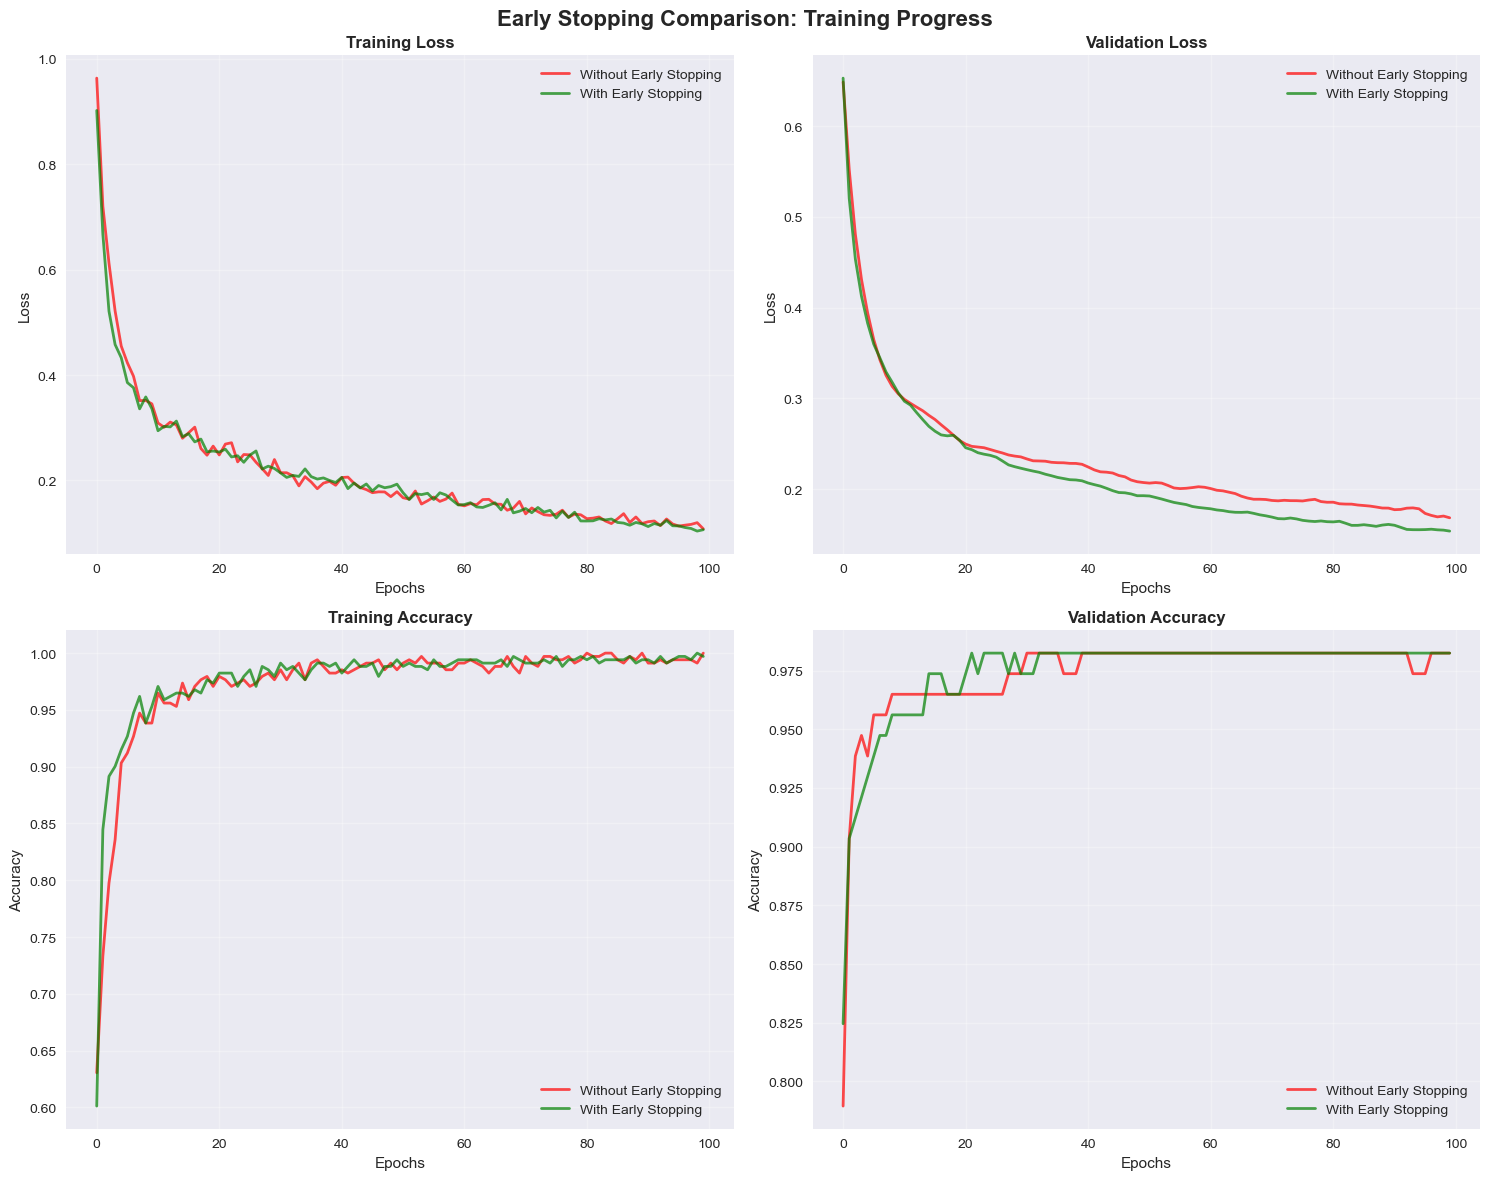


🔬 FINAL MODEL EVALUATION ON TEST SET:
Model WITHOUT Early Stopping:
   🎯 Test Accuracy: 0.9649
   💢 Test Loss: 0.2117

Model WITH Early Stopping:
   🎯 Test Accuracy: 0.9474
   💢 Test Loss: 0.2475

✨ Test Accuracy Improvement: -0.0175
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


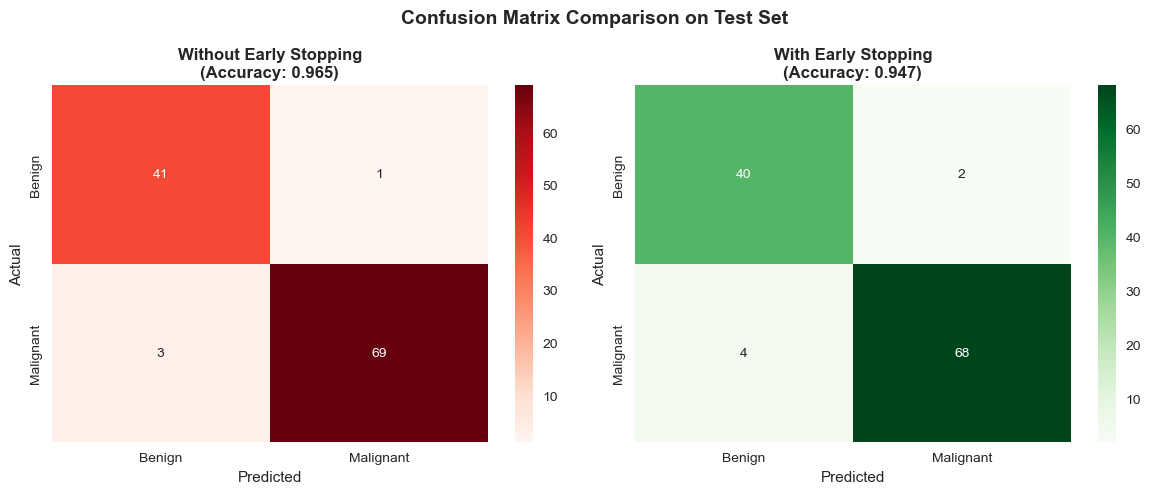


📈 KEY INSIGHTS:
• Early stopping prevents overfitting by stopping training at the optimal point
• It saves computational time by avoiding unnecessary epochs
• The model with early stopping often generalizes better to unseen data
• Using callbacks like ModelCheckpoint ensures we save the best performing model
• Patience parameter controls how long to wait before stopping


In [19]:
# Visualize the training progress comparison
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Early Stopping Comparison: Training Progress', fontsize=16, fontweight='bold', y=0.98)

# Plot 1: Training Loss Comparison
ax1.plot(history_no_early.history['loss'], label='Without Early Stopping', color='red', alpha=0.7, linewidth=2)
ax1.plot(history_with_early.history['loss'], label='With Early Stopping', color='green', alpha=0.7, linewidth=2)
ax1.set_title('Training Loss', fontweight='bold', fontsize=12)
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Validation Loss Comparison
ax2.plot(history_no_early.history['val_loss'], label='Without Early Stopping', color='red', alpha=0.7, linewidth=2)
ax2.plot(history_with_early.history['val_loss'], label='With Early Stopping', color='green', alpha=0.7, linewidth=2)
# Mark the early stopping point
if len(history_with_early.history['val_loss']) < len(history_no_early.history['val_loss']):
    stop_epoch = len(history_with_early.history['val_loss'])
    ax2.axvline(x=stop_epoch, color='orange', linestyle='--', alpha=0.8, label=f'Early Stop (Epoch {stop_epoch})')
ax2.set_title('Validation Loss', fontweight='bold', fontsize=12)
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot 3: Training Accuracy Comparison
ax3.plot(history_no_early.history['accuracy'], label='Without Early Stopping', color='red', alpha=0.7, linewidth=2)
ax3.plot(history_with_early.history['accuracy'], label='With Early Stopping', color='green', alpha=0.7, linewidth=2)
ax3.set_title('Training Accuracy', fontweight='bold', fontsize=12)
ax3.set_xlabel('Epochs')
ax3.set_ylabel('Accuracy')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Plot 4: Validation Accuracy Comparison
ax4.plot(history_no_early.history['val_accuracy'], label='Without Early Stopping', color='red', alpha=0.7, linewidth=2)
ax4.plot(history_with_early.history['val_accuracy'], label='With Early Stopping', color='green', alpha=0.7, linewidth=2)
# Mark the early stopping point
if len(history_with_early.history['val_accuracy']) < len(history_no_early.history['val_accuracy']):
    stop_epoch = len(history_with_early.history['val_accuracy'])
    ax4.axvline(x=stop_epoch, color='orange', linestyle='--', alpha=0.8, label=f'Early Stop (Epoch {stop_epoch})')
ax4.set_title('Validation Accuracy', fontweight='bold', fontsize=12)
ax4.set_xlabel('Epochs')
ax4.set_ylabel('Accuracy')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Final model evaluation on test set
print("\n🔬 FINAL MODEL EVALUATION ON TEST SET:")
print("="*50)

# Evaluate both models on test set
test_loss_no_early, test_acc_no_early = model_no_early.evaluate(X_test_scaled, y_test, verbose=0)
test_loss_with_early, test_acc_with_early = model_with_early.evaluate(X_test_scaled, y_test, verbose=0)

print(f"Model WITHOUT Early Stopping:")
print(f"   🎯 Test Accuracy: {test_acc_no_early:.4f}")
print(f"   💢 Test Loss: {test_loss_no_early:.4f}")

print(f"\nModel WITH Early Stopping:")
print(f"   🎯 Test Accuracy: {test_acc_with_early:.4f}")
print(f"   💢 Test Loss: {test_loss_with_early:.4f}")

test_improvement = test_acc_with_early - test_acc_no_early
print(f"\n✨ Test Accuracy Improvement: {test_improvement:+.4f}")

# Calculate predictions for confusion matrix
y_pred_no_early = (model_no_early.predict(X_test_scaled) > 0.5).astype(int)
y_pred_with_early = (model_with_early.predict(X_test_scaled) > 0.5).astype(int)

# Create confusion matrices
from sklearn.metrics import confusion_matrix, classification_report

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle('Confusion Matrix Comparison on Test Set', fontsize=14, fontweight='bold')

# Without early stopping
cm_no_early = confusion_matrix(y_test, y_pred_no_early)
sns.heatmap(cm_no_early, annot=True, fmt='d', cmap='Reds', ax=ax1,
            xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
ax1.set_title(f'Without Early Stopping\n(Accuracy: {test_acc_no_early:.3f})', fontweight='bold')
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Actual')

# With early stopping
cm_with_early = confusion_matrix(y_test, y_pred_with_early)
sns.heatmap(cm_with_early, annot=True, fmt='d', cmap='Greens', ax=ax2,
            xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
ax2.set_title(f'With Early Stopping\n(Accuracy: {test_acc_with_early:.3f})', fontweight='bold')
ax2.set_xlabel('Predicted')
ax2.set_ylabel('Actual')

plt.tight_layout()
plt.show()

print("\n📈 KEY INSIGHTS:")
print("• Early stopping prevents overfitting by stopping training at the optimal point")
print("• It saves computational time by avoiding unnecessary epochs")
print("• The model with early stopping often generalizes better to unseen data")
print("• Using callbacks like ModelCheckpoint ensures we save the best performing model")
print("• Patience parameter controls how long to wait before stopping")

## 10. Hyperparameter Tuning Best Practices 🎛️



**What is Hyperparameter Tuning?**
Hyperparameter tuning is the process of finding the optimal combination of hyperparameters that maximize your model's performance. Unlike model parameters (weights and biases), hyperparameters are set before training begins.

**Key Hyperparameters to Tune:**

🎯 **Architecture Parameters:**
- Number of layers
- Number of neurons per layer
- Activation functions

⚙️ **Training Parameters:**
- Learning rate
- Batch size
- Optimizer choice

🛡️ **Regularization Parameters:**
- Dropout rate
- L1/L2 regularization strength
- Early stopping patience

**Tuning Strategies:**

1. **Grid Search**: Try all combinations (systematic but expensive)
2. **Random Search**: Sample combinations randomly (often more efficient)
3. **Bayesian Optimization**: Use past results to guide future searches
4. **Manual Tuning**: Start with common values and adjust based on results

**Best Practices:**

✅ **Start Simple**: Begin with a simple model and gradually increase complexity  
✅ **Use Validation Data**: Always tune on validation set, never on test set  
✅ **Set Budgets**: Limit time/resources spent on tuning  
✅ **Document Results**: Keep track of what works and what doesn't  
✅ **Use Cross-Validation**: Get more robust estimates of performance

In [20]:
# Let's demonstrate hyperparameter tuning with a simple grid search approach
# We'll tune key hyperparameters manually to show the process

print("🎛️ HYPERPARAMETER TUNING DEMONSTRATION")
print("="*50)

# Define hyperparameter ranges to explore
hyperparameter_grid = {
    'learning_rates': [0.001, 0.01, 0.1],
    'dropout_rates': [0.2, 0.3, 0.5],
    'hidden_units': [32, 64, 128],
    'l2_strengths': [0.001, 0.01, 0.1]
}

print("🔍 Hyperparameter Grid:")
for param, values in hyperparameter_grid.items():
    print(f"   {param}: {values}")

def create_tuned_model(input_dim, learning_rate=0.001, dropout_rate=0.3, 
                       hidden_units=64, l2_strength=0.001):
    """Create model with specified hyperparameters"""
    model = Sequential([
        Dense(hidden_units, activation='relu', input_shape=(input_dim,),
              kernel_initializer='he_normal',
              kernel_regularizer=regularizers.l2(l2_strength)),
        Dropout(dropout_rate),
        Dense(hidden_units//2, activation='relu',
              kernel_initializer='he_normal',
              kernel_regularizer=regularizers.l2(l2_strength)),
        Dropout(dropout_rate),
        Dense(1, activation='sigmoid')
    ])
    
    model.compile(
        optimizer=optimizers.Adam(learning_rate=learning_rate),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    
    return model

# Perform a small grid search (simplified for demonstration)
print("\n🚀 Performing simplified grid search...")
print("⚠️  Note: In practice, you'd use tools like Keras Tuner or Optuna for efficiency")

results = []
best_score = 0
best_params = None

# Sample a few combinations to demonstrate
sample_combinations = [
    {'learning_rate': 0.001, 'dropout_rate': 0.3, 'hidden_units': 64, 'l2_strength': 0.001},
    {'learning_rate': 0.01, 'dropout_rate': 0.2, 'hidden_units': 32, 'l2_strength': 0.01},
    {'learning_rate': 0.001, 'dropout_rate': 0.5, 'hidden_units': 128, 'l2_strength': 0.001},
]

for i, params in enumerate(sample_combinations, 1):
    print(f"\n🔧 Configuration {i}: {params}")
    
    # Create and train model
    model = create_tuned_model(X_train_scaled.shape[1], **params)
    
    # Early stopping for efficiency
    early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=0)
    
    # Train model
    history = model.fit(
        X_train_scaled, y_train,
        epochs=50,
        batch_size=32,
        validation_data=(X_val_scaled, y_val),
        callbacks=[early_stop],
        verbose=0
    )
    
    # Evaluate
    val_loss, val_accuracy = model.evaluate(X_val_scaled, y_val, verbose=0)
    
    # Store results
    result = {
        'params': params,
        'val_accuracy': val_accuracy,
        'val_loss': val_loss,
        'epochs_trained': len(history.history['accuracy'])
    }
    results.append(result)
    
    print(f"   📊 Validation Accuracy: {val_accuracy:.4f}")
    print(f"   📉 Validation Loss: {val_loss:.4f}")
    print(f"   ⏰ Epochs Trained: {len(history.history['accuracy'])}")
    
    # Track best configuration
    if val_accuracy > best_score:
        best_score = val_accuracy
        best_params = params

print(f"\n🏆 BEST CONFIGURATION FOUND:")
print(f"   Parameters: {best_params}")
print(f"   Validation Accuracy: {best_score:.4f}")

# Train final model with best parameters
print(f"\n🎯 Training final model with best parameters...")
final_model = create_tuned_model(X_train_scaled.shape[1], **best_params)

final_early_stop = EarlyStopping(
    monitor='val_loss', 
    patience=15, 
    restore_best_weights=True,
    verbose=1
)

final_history = final_model.fit(
    X_train_scaled, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_val_scaled, y_val),
    callbacks=[final_early_stop],
    verbose=0
)

# Final evaluation
final_test_loss, final_test_accuracy = final_model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"\n🎉 FINAL MODEL PERFORMANCE:")
print(f"   🎯 Test Accuracy: {final_test_accuracy:.4f}")
print(f"   💢 Test Loss: {final_test_loss:.4f}")
print(f"   ⏰ Training Epochs: {len(final_history.history['accuracy'])}")

# Compare all configurations
print(f"\n📊 ALL CONFIGURATIONS COMPARISON:")
print("-" * 80)
print(f"{'Config':<8} {'Learning Rate':<13} {'Dropout':<8} {'Hidden Units':<12} {'L2':<8} {'Val Acc':<8}")
print("-" * 80)
for i, result in enumerate(results, 1):
    params = result['params']
    print(f"{i:<8} {params['learning_rate']:<13} {params['dropout_rate']:<8} "
          f"{params['hidden_units']:<12} {params['l2_strength']:<8} {result['val_accuracy']:<8.4f}")

print(f"\n💡 KEY INSIGHTS FROM HYPERPARAMETER TUNING:")
print("• Different hyperparameter combinations can significantly impact performance")
print("• Lower learning rates often require more epochs but can achieve better results")
print("• The optimal dropout rate balances regularization without losing too much information")
print("• Model architecture (hidden units) should match data complexity")
print("• L2 regularization strength needs careful balancing")
print("• Always validate hyperparameters on unseen data (validation set)")

🎛️ HYPERPARAMETER TUNING DEMONSTRATION
🔍 Hyperparameter Grid:
   learning_rates: [0.001, 0.01, 0.1]
   dropout_rates: [0.2, 0.3, 0.5]
   hidden_units: [32, 64, 128]
   l2_strengths: [0.001, 0.01, 0.1]

🚀 Performing simplified grid search...
⚠️  Note: In practice, you'd use tools like Keras Tuner or Optuna for efficiency

🔧 Configuration 1: {'learning_rate': 0.001, 'dropout_rate': 0.3, 'hidden_units': 64, 'l2_strength': 0.001}
   📊 Validation Accuracy: 0.9825
   📉 Validation Loss: 0.2078
   ⏰ Epochs Trained: 50

🔧 Configuration 2: {'learning_rate': 0.01, 'dropout_rate': 0.2, 'hidden_units': 32, 'l2_strength': 0.01}
   📊 Validation Accuracy: 0.9825
   📉 Validation Loss: 0.2078
   ⏰ Epochs Trained: 50

🔧 Configuration 2: {'learning_rate': 0.01, 'dropout_rate': 0.2, 'hidden_units': 32, 'l2_strength': 0.01}
   📊 Validation Accuracy: 0.9825
   📉 Validation Loss: 0.1004
   ⏰ Epochs Trained: 40

🔧 Configuration 3: {'learning_rate': 0.001, 'dropout_rate': 0.5, 'hidden_units': 128, 'l2_strength'

## 🎯 Conclusion and Best Practices Summary

![Neural Network Success](https://miro.medium.com/v2/resize:fit:1400/1*bhFifratH9DjKqMBTeQG5A.gif)

Congratulations! 🎉 You've completed a comprehensive journey through neural network tuning and optimization. Let's summarize the key concepts and best practices:

### 📚 **What We've Learned:**

**1. Data Preprocessing & Normalization** 📊
- Always normalize/standardize your input features
- Use appropriate encoders for categorical data
- Split data properly (train/validation/test)

**2. Bias-Variance Trade-off** ⚖️
- Simple models: High bias, low variance
- Complex models: Low bias, high variance  
- Find the sweet spot for your data

**3. Regularization Techniques** 🛡️
- **L1 Regularization**: Feature selection, sparse models
- **L2 Regularization**: Prevents large weights, smoother models
- **Dropout**: Prevents co-adaptation, improves generalization

**4. Optimization Algorithms** 🚀
- **SGD**: Simple, requires careful learning rate tuning
- **SGD + Momentum**: Faster convergence, overcomes local minima
- **RMSprop**: Adaptive learning rates, good for RNNs
- **Adam**: Combines momentum + RMSprop, generally excellent default
- **AdamW**: Adam with better weight decay

**5. Weight Initialization** 🎲
- **He**: Best for ReLU activations
- **Xavier/Glorot**: Good for sigmoid/tanh activations
- **LeCun**: Optimized for SELU activations
- Proper initialization prevents vanishing/exploding gradients

**6. Early Stopping** 🛑
- Prevents overfitting automatically
- Saves computational resources
- Restores best weights for optimal performance

**7. Hyperparameter Tuning** 🎛️
- Systematic search for optimal parameters
- Use validation data, never test data
- Balance exploration vs. exploitation

### 🏗️ **Neural Network Development Workflow:**

```
1. 📊 Load & Explore Data
   ↓
2. 🔧 Preprocess & Normalize
   ↓
3. 🏗️ Build Baseline Model
   ↓
4. 🛡️ Add Regularization
   ↓
5. ⚙️ Optimize Training (Optimizer, LR, Initialization)
   ↓
6. 🛑 Implement Early Stopping
   ↓
7. 🎛️ Tune Hyperparameters
   ↓
8. 🎯 Final Evaluation on Test Set
```

### ⚡ **Quick Reference - Best Practices:**

✅ **DO's:**
- Always normalize your input data
- Use He initialization with ReLU activations
- Start with Adam optimizer (lr=0.001)
- Implement early stopping (patience=10-20)
- Use dropout (0.2-0.5) for regularization
- Validate on separate validation set
- Keep test set for final evaluation only

❌ **DON'Ts:**
- Don't skip data preprocessing
- Don't use the same data for training and validation
- Don't ignore validation curves (watch for overfitting)
- Don't tune hyperparameters on test data
- Don't use too high learning rates initially
- Don't forget to save your best model

### 🚀 **Next Steps:**

1. **Practice**: Apply these concepts to your own datasets
2. **Experiment**: Try different architectures and techniques
3. **Learn More**: Explore advanced topics like:
   - Batch Normalization
   - Learning Rate Scheduling
   - Advanced Regularization (DropConnect, etc.)
   - Neural Architecture Search (NAS)
4. **Tools**: Explore automated hyperparameter tuning with:
   - Keras Tuner
   - Optuna
   - Ray Tune

### 🔗 **Useful Resources:**

- [Deep Learning Book](https://www.deeplearningbook.org/) - Comprehensive theory
- [Keras Documentation](https://keras.io/) - Practical implementation
- [Papers With Code](https://paperswithcode.com/) - Latest research
- [Distill.pub](https://distill.pub/) - Visual explanations

---

**Remember**: Neural network tuning is both an art and a science. Start with proven techniques, understand your data, and don't be afraid to experiment! 🧠✨

*Happy Deep Learning! 🚀🎯*